In [1]:
import numpy as np
from pykeen.triples import TriplesFactory
from pykeen.evaluation import RankBasedEvaluator

import torch

# Replace these lists with your actual triples data
triples = [('SERF1', 'interacts', 'RICE PROLAMIN-BOX BINDING FACTOR'), ('SERF1', 'interacts', 'RPBF'), ('SERF1 overexpression', 'inhibits', 'RPBF'), ('SERF1', 'interacts', 'RPBF expression'), ('GRANULE-BOUND STARCH SYNTHASEI', 'is-in', 'SERF1 knockout grains'), ('GBSSI', 'is-in', 'SERF1 knockout grains'), ('STARCH SYNTHASEI', 'is-in', 'SERF1 knockout grains'), ('SSI', 'is-in', 'SERF1 knockout grains'), ('SSIIIa', 'is-in', 'SERF1 knockout grains'), ('ADP-GLUCOSE PYROPHOSPHORYLASE LARGE SUBUNIT2', 'is-in', 'SERF1 knockout grains'), ('AGPL2', 'is-in', 'SERF1 knockout grains'), ('SERF1', 'interacts', 'GBSSI'), ('SERF1', 'interacts', 'RPBF expression'), ('RPBF expression', 'interacts', 'RICE AMYLASE1A'), ('RPBF expression', 'interacts', 'RAmy1A'), ('RPBF expression', 'interacts', 'gibberellic acid (GA)-induced expression'), ('SERF1', 'interacts', 'RPBF'), ('gibberellic acid', 'is-in', 'giant scarlet runner bean and common bean suspensors'), ('Eutrema salsugineum', 'produces', 'H2O2'), ('Thellungiella salsuginea', 'produces', 'H2O2'), ('Arabidopsis thaliana', 'produces', 'H2O2'), ('H2O2', 'is-in', 'E. salsugineum'), ('glucosinolate', 'is-in', 'E. salsugineum water-treated leaves'), ('jasmonate pathway', 'interacts', 'cell death program'), ('abscisic acid', 'inhibits', 'amaranthin'), ('gibberellic acid', 'inhibits', 'amaranthin'), ('amaranthin', 'is-in', 'Amaranthus tricolor seedlings'), ('8-azaguanine', 'inhibits', 'amaranthin'), ('cycloheximide', 'inhibits', 'amaranthin'), ('gibberellic acid ( GA ) signaling', 'activates', 'growth-inhibitory DELLA proteins'), ('K+-deprivation', 'activates', 'JUNGBRUNNEN1'), ('K+-deprivation', 'activates', 'JUB1'), ('K+-deprivation', 'activates', 'C-repeat-binding factor (CBF)/dehydration-responsive element-binding factor 1 regulon'), ('JUNGBRUNNEN1', 'interacts', 'GA signaling'), ('JUB1', 'interacts', 'GA signaling'), ('C-repeat-binding factor (CBF)/dehydration-responsive element-binding factor 1 regulon', 'interacts', 'GA signaling'), ('JUB1', 'interacts', 'K+'), ('CBF1', 'interacts', 'K+'), ('JUB1', 'interacts', 'K+-deprivation'), ('CBF1', 'interacts', 'K+-deprivation'), ('SFR6', 'interacts', 'K+-deprivation'), ('JUB1', 'interacts', 'DELLAs'), ('CBF1', 'interacts', 'DELLAs'), ('SFR6', 'interacts', 'DELLAs'), ('SCF(COI1)-JAZ co-receptor complex', 'is-in', 'JA perception'), ('SCF(COI1)-JAZ co-receptor complex', 'interacts', 'MYB-type and MYC-type transcription factors'), ('JA-dependent transcription factors', 'interacts', 'anthocyanin'), ('JA-dependent transcription factors', 'interacts', 'nicotine'), ('JA-dependent transcription factors', 'interacts', 'TIAs'), ('JA-dependent transcription factors', 'interacts', 'glucosinolates'), ('JA-dependent transcription factors', 'interacts', 'artemisinin'), ('UVR8 protein', 'interacts', 'UV-B radiation'), ('UV-B', 'interacts', 'UVR8'), ('MAPK cascade', 'interacts', 'UV radiation'), ('UV radiation', 'activates', 'reactive oxygen species'), ('UV radiation', 'activates', 'ROS'), ('ROS', 'activates', 'Arabidopsis metacaspase-8'), ('ROS', 'activates', 'AtMC8'), ('SA', 'interacts', 'ROS'), ('JA', 'interacts', 'ROS'), ('SA', 'inhibits', 'ROS mediated cell death'), ('JA', 'inhibits', 'ROS mediated cell death'), ('Oidium neolycopersici', 'produces', 'powdery mildew'), ('elicitin', 'inhibits', 'powdery mildew'), ('BABA', 'inhibits', 'powdery mildew'), ('oligandrin- and BABA-induced resistance', 'is-in', '"S. lycopersicum \' Amateur \'"'), ('ethylene-dependent signalling pathway', 'is-in', '"S. lycopersicum \' Amateur \'"'), ('jasmonic acid-mediated signalling', 'interacts', 'elicitins'), ('Gibberellic acid', 'activates', 'salt tolerance'), ('GA(3 )', 'activates', 'salt tolerance'), ('salt', 'inhibits', 'Oats'), ('Barley gene Jekyll', 'interacts', 'grain development'), ('Jekyll', 'interacts', 'cereal sexual reproduction'), ('Ascochyta blight', 'inhibits', 'lentil'), ('non-allelic ascochyta blight resistance genes', 'is-in', 'CDC Robin'), ('non-allelic ascochyta blight resistance genes', 'is-in', '964a-46'), ('CDC Robin', 'inhibits', 'ascochyta blight'), ('964a-46', 'inhibits', 'ascochyta blight'), ('CDC Robin', 'activates', 'receptor like kinases'), ('964a-46', 'activates', 'receptor like kinases'), ('receptor like kinases', 'interacts', 'pathogen-associated molecular patterns ( PAMP ) recognition'), ('Puccinia graminis f. sp. tritici', 'produces', 'Wheat stem rust'), ('Puccinia graminis f. sp. tritici', 'inhibits', 'wheat'), ('cysteine-rich receptor-like kinases', 'is-in', 'chromosome 7AL'), ('Fusarium species', 'inhibits', 'wheat'), ('Fusarium species', 'inhibits', 'maize'), ('F. graminearum infection', 'produces', 'Fusarium head blight'), ('F. graminearum infection', 'produces', 'FHB'), ('SA', 'interacts', 'PA and ROS synthesis'), ('JA', 'interacts', 'PA and ROS synthesis'), ('SA', 'is-in', 'Wangshuibai'), ('JA', 'is-in', 'Wangshuibai'), ('salicylic acid (SA)-induced protein kinase', 'is-in', 'tobacco'), ('SIPK', 'is-in', 'tobacco'), ('wounding-induced protein kinase', 'is-in', 'tobacco'), ('WIPK', 'is-in', 'tobacco'), ('NO', 'activates', 'SIPK'), ('SA', 'activates', 'SIPK'), ('SA', 'activates', 'SIPK'), ('NO-mediated induction', 'activates', 'SIPK'), ('SIPK', 'is-in', 'NO signaling pathway'), ('N-half tetratricopeptide repeat ( TPR ) domain', 'is-in', 'SPINDLY'), ('C-half catalytic domain', 'is-in', 'SPINDLY'), ('TPR motifs', 'is-in', 'N-half tetratricopeptide repeat ( TPR ) domain'), ('N-half tetratricopeptide repeat ( TPR ) domain', 'is-in', 'SPY'), ('C-half catalytic domain', 'is-in', 'SPY'), ('SPY', 'inhibits', 'GA signalling'), ('HvSPY', 'inhibits', 'GA(3)-induced alpha-amylase expression'), ('HvTPR', 'inhibits', 'GA(3)-induced alpha-amylase expression'), ('HvSPY', 'is-in', 'barley aleurone cells'), ('TPRs', 'interacts', 'SPY activity'), ('sour orange', 'interacts', 'Tetranychus urticae'), ('Cleopatra mandarin', 'interacts', 'Tetranychus urticae'), ('T. urticae herbivore-induced plant volatiles', 'is-in', 'sour orange plants'), ('T. urticae herbivore-induced plant volatiles', 'inhibits', 'conspecific mites'), ('T. urticae HIPVs', 'is-in', 'Cleopatra mandarin plants'), ('T. urticae HIPVs', 'activates', 'conspecific mite attraction'), ('HIPVs', 'is-in', 'sour orange plants'), ('T. urticae', 'activates', 'HIPVs'), ('HIPVs', 'activates', 'oxylipin biosynthetic gene lipoxygenase2'), ('HIPVs', 'activates', 'LOX2'), ('HIPVs', 'interacts', 'Cleopatra mandarin plants'), ('CaWRKY40', 'is-in', 'pepper'), ('CaWRKY40', 'activates', 'W-box-containing reporter gene'), ('CaWRKY40 transcripts', 'is-in', 'pepper'), ('Ralstonia solanacearum', 'activates', 'CaWRKY40 transcripts'), ('CaWRKY40', 'inhibits', 'R. solanacearum'), ('CaWRKY40', 'is-in', 'tobacco'), ('CaWRKY40', 'is-in', 'pepper'), ('salicylic acid', 'interacts', 'CaWRKY40 transcripts'), ('CaWRKY40 transcripts', 'interacts', 'SA'), ('CaWRKY40 transcripts', 'interacts', 'jasmonic acid'), ('CaWRKY40 transcripts', 'interacts', 'JA'), ('CaWRKY40 transcripts', 'interacts', 'ethylene'), ('CaWRKY40 transcripts', 'interacts', 'ET'), ('CaWRKY40', 'interacts', 'hypersensitive response (HR)-associated and pathogenesis-related genes'), ('CaWRKY40 orthologs', 'interacts', 'R. solanacearum'), ('CaWRKY40 orthologs', 'is-in', 'pepper'), ('CaWRKY40 orthologs', 'is-in', 'tobacco'), ('AOS', 'interacts', 'lipoxygenase-derived fatty acid hydroperoxides'), ('Allene oxide synthase', 'interacts', 'lipoxygenase-derived fatty acid hydroperoxides'), ('lipoxygenase-derived fatty acid hydroperoxides', 'produces', 'allene epoxides'), ('AOS gene expression', 'is-in', 'flax'), ('AOS gene expression', 'is-in', 'Linum usitatissimum'), ('AOS', 'is-in', 'flax plants'), ('12-oxo-phytodienoic acid', 'activates', 'AOS gene expression'), ('JA', 'activates', 'AOS gene expression'), ('12-oxo-phytodienoic acid', 'produces', 'JA'), ('JA', 'is-in', 'flax leaves'), ('SA', 'inhibits', 'AOS transcripts'), ('aspirin', 'inhibits', 'AOS transcripts'), ('JA', 'interacts', 'AOS gene expression'), ('SA', 'interacts', 'AOS gene expression'), ('aspirin', 'interacts', 'AOS gene expression'), ('SRD1', 'is-in', 'sweetpotato'), ('SRD1', 'is-in', '"Ipomoea batatas cv . \' White Star \'"'), ('IAA', 'activates', 'SRD1 promoter activity'), ('SRD1 promoter', 'activates', 'taproot-specific expression'), ('SRD1 promoter', 'activates', 'tuber-specific expression'), ('α-amylase', 'is-in', 'barley'), ('α-amylase', 'is-in', 'Hordeum vulgare L. cv . Himalaya'), ('EC 3.2.1.1', 'is-in', 'barley'), ('EC 3.2.1.1', 'is-in', 'Hordeum vulgare L. cv . Himalaya'), ('hydrolases', 'is-in', 'barley'), ('hydrolases', 'is-in', 'Hordeum vulgare L. cv . Himalaya'), ('Ca(2 + )', 'activates', 'group-B isoenzymes'), ('Ca(2 + )', 'interacts', 'α-amylase'), ('Ca(2 + )', 'interacts', 'acid hydrolases'), ('GIBBERELLIN INSENSITIVE DWARF1', 'produces', 'soluble gibberellin ( GA ) receptor'), ('GID1', 'produces', 'soluble gibberellin ( GA ) receptor'), ('GID1-GA complex', 'interacts', 'SLENDER RICE1'), ('GID1-GA complex', 'interacts', 'SLR1'), ('SLENDER RICE1', 'is-in', 'GA signaling'), ('SLR1', 'is-in', 'GA signaling'), ('GA(4 )', 'interacts', 'GID1'), ('DELLA and TVHYNP domains', 'is-in', 'SLR1'), ('DELLA and TVHYNP domains', 'interacts', 'GID1-SLR1 interaction'), ('SLR1', 'interacts', 'GID1-SLR1 interaction'), ('SLR1', 'interacts', 'GA-GID1 interaction'), ('GA', 'interacts', 'GID1'), ('GA', 'interacts', 'SLR1'), ('GID1', 'interacts', 'SLR1'), ('cPITO', 'inhibits', 'elicitor-induced NO generation and JA accumulation'), ('JA biosynthesis inhibitors', 'inhibits', 'elicitor-induced NO generation and JA accumulation'), ('cPITO', 'inhibits', 'elicitor-induced hypericin production'), ('JA biosynthesis inhibitors', 'inhibits', 'elicitor-induced hypericin production'), ('JA', 'interacts', 'elicitor-induced hypericin biosynthesis .'), ('NO', 'interacts', 'elicitor-induced hypericin biosynthesis .'), ('cPITO', 'inhibits', 'elicitor-induced NO generation and JA biosynthesis'), ('NO', 'interacts', 'JA'), ('NO', 'activates', 'hypericin production'), ('JA biosynthesis inhibitors', 'inhibits', 'Sodium-nitroprusside-induced hypericin production'), ('JA biosynthesis', 'interacts', 'NO-induced hypericin production'), ('hypericin production', 'is-in', 'H. perforatum cells'), ('JA biosynthesis', 'is-in', 'H. perforatum cells'), ('elicitor-induced NO generation', 'is-in', 'H. perforatum cells'), ('NO', 'interacts', 'elicitor-induced hypericin biosynthesis'), ('NO', 'interacts', 'JA-dependent signaling pathway'), ('JA-dependent signaling pathway', 'interacts', 'elicitor-induced hypericin biosynthesis'), ('elicitor-induced NO generation', 'interacts', 'JA biosynthesis'), ('JA biosynthesis', 'interacts', 'hypericin production'), ('elicitor-induced NO generation', 'interacts', 'hypericin production'), ('Ser-CPs', 'is-in', 'gibberellic acid-induced barley aleurone'), ('serine carboxypeptidases', 'is-in', 'gibberellic acid-induced barley aleurone'), ('Ser-CPs', 'is-in', 'cereal grains'), ('CP-MI', 'is-in', 'barley grains'), ('CP-MII', 'is-in', 'barley grains'), ('CP-MIII', 'is-in', 'barley grains'), ('MeJA', 'activates', 'basic helix-loop-helix factors'), ('MeJA', 'activates', 'ethylene response factors'), ('ethylene response factors', 'is-in', 'BY-2 cells'), ('basic helix-loop-helix factors', 'is-in', 'BY-2 cells'), ('ethylene response factors', 'is-in', 'nic mutants'), ('basic helix-loop-helix factors', 'is-in', 'nic mutants'), ('JA-modulated regulation', 'is-in', 'tobacco'), ('poly- and oligosaccharides', 'interacts', 'phytoalexin synthesis'), ('fatty acids', 'interacts', 'phytoalexin synthesis'), ('Bacillus cereus AR156', 'inhibits', 'Pseudomonas syringae pv . tomato DC3000'), ('Bacillus cereus AR156', 'interacts', 'Arabidopsis'), ('Bacillus cereus AR156', 'inhibits', 'Pst DC3000'), ('AR156', 'activates', 'ISR'), ('PR1 protein expression', 'activates', 'multilayered ISR defense response'), ('AR156', 'activates', 'multilayered ISR defense response'), ('AR156', 'activates', 'hydrogen peroxide accumulation'), ('AR156', 'activates', 'callose deposition'), ('hydrogen peroxide accumulation', 'activates', 'multilayered ISR defense response'), ('callose deposition', 'activates', 'multilayered ISR defense response'), ('AR156', 'activates', 'ISR'), ('ISR', 'is-in', 'sid2 - 2 and NahG mutants'), ('AR156-induced ISR', 'interacts', 'JA/ET-signaling pathway'), ('AR156-induced ISR', 'interacts', 'NPR1'), ('MAPK signaling', 'is-in', 'pathogen associated molecular pattern (PAMP)-triggered immunity'), ('FRK1/WRKY53 gene expression', 'is-in', 'pathogen associated molecular pattern (PAMP)-triggered immunity'), ('MAPK signaling', 'is-in', 'PTI'), ('FRK1/WRKY53 gene expression', 'is-in', 'PTI'), ('AR156', 'activates', 'ISR'), ('JA/ET-signaling pathways', 'activates', 'ISR'), ('AR156', 'activates', 'JA/ET-signaling pathways'), ('PTI', 'interacts', 'AR156'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'jasmonic acid'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'JA'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'jasmonoyl-isoleucine'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'JA-Ile'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'H(2)O(2 )'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'inhibits', 'ethylene'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'phenolamides'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'activates', 'PAs'), ('jasmonic acid', 'is-in', 'rice'), ('JA', 'is-in', 'rice'), ('jasmonoyl-isoleucine', 'is-in', 'rice'), ('JA-Ile', 'is-in', 'rice'), ('H(2)O(2 )', 'is-in', 'rice'), ('WBPH nymph', 'activates', 'PAs'), ('JA', 'is-in', 'rice'), ('JA-Ile', 'is-in', 'rice'), ('ethylene', 'is-in', 'rice'), ('H(2)O(2 )', 'is-in', 'rice'), ('brown planthopper Nilaparvata lugens gravid females', 'interacts', 'PAs'), ('N1,N10-diferuloylspermidine', 'inhibits', 'WBPH female adults'), ('feruloylagmatine', 'inhibits', 'WBPH female adults'), ('N-feruloyltyramine', 'inhibits', 'WBPH female adults'), ('N-feruloylputrescine', 'inhibits', 'WBPH female adults'), ('WBPH- or BPH-induced biosynthesis', 'produces', 'PAs'), ('PAs', 'inhibits', 'WBPH'), ('WBPH- or BPH-induced biosynthesis', 'is-in', 'rice'), ('WBPH', 'interacts', 'rice'), ('Pst DC3000', 'inhibits', 'tomato'), ('Pseudomonas syringae pv tomato DC3000', 'inhibits', 'tomato'), ('Pseudomonas syringae pv tomato DC3000', 'inhibits', 'Solanum lycopersicum'), ('Pst DC3000', 'inhibits', 'Solanum lycopersicum'), ('Pseudomonas syringae pv tomato DC3000', 'inhibits', 'Arabidopsis'), ('Pseudomonas syringae pv tomato DC3000', 'inhibits', 'Arabidopsis thaliana'), ('Pst DC3000', 'inhibits', 'Arabidopsis'), ('Pst DC3000', 'inhibits', 'Arabidopsis thaliana'), ('Pseudomonas syringae pv tomato DC3000', 'produces', 'coronatine'), ('Pst DC3000', 'produces', 'coronatine'), ('Pseudomonas syringae pv tomato DC3000', 'produces', 'COR'), ('Pst DC3000', 'produces', 'coronatine'), ('Pst DC3000', 'produces', 'COR'), ('COR', 'interacts', 'ALC1'), ('Coronatine-Insensitive1', 'interacts', 'ALC1'), ('Thylakoid Formation1', 'is-in', 'Arabidopsis'), ('THF1', 'is-in', 'Arabidopsis'), ('SlALC1', 'is-in', 'tomato'), ('Pst DC3000', 'inhibits', 'Arabidopsis thf1 mutant'), ('Pst DC3000', 'inhibits', 'SlALC1-silenced tomato plants'), ('COR', 'interacts', 'ALC1 localization'), ('water', 'interacts', 'grape'), ('water', 'interacts', 'phytohormones'), ('water', 'interacts', 'grape berry ripening'), ('jasmonic acid', 'interacts', 'HIPVs'), ('JA', 'interacts', 'HIPVs'), ('methyl jasmonate', 'interacts', 'HIPVs'), ('MeJA', 'interacts', 'HIPVs'), ('gypsy moth caterpillars', 'interacts', 'blueberry plants'), ('MeJA', 'interacts', 'blueberry plants'), ('blueberry branches', 'interacts', 'HIPVs'), ('HIPVs', 'activates', 'JA'), ('blueberry branches', 'produces', 'JA'), ('gypsy moth', 'activates', 'blueberry volatiles'), ('MeJA', 'activates', 'blueberry volatiles'), ('Histone', 'is-in', 'chromatin'), ('Histone', 'is-in', 'nucleosomes'), ('HH3 genes', 'is-in', 'cotton'), ('HH3 genes', 'is-in', 'Gossypium hirsutum'), ('GhHH3 genes', 'is-in', 'cotton ovule tissues'), ('sodium chloride', 'interacts', 'GhHH3 gene expression'), ('NaCl', 'interacts', 'GhHH3 gene expression'), ('polyethylene glycol', 'interacts', 'GhHH3 gene expression'), ('PEG', 'interacts', 'GhHH3 gene expression'), ('brassinolide', 'interacts', 'GhHH3 gene expression'), ('BL', 'interacts', 'GhHH3 gene expression'), ('gibberellic acid', 'interacts', 'GhHH3 gene expression'), ('GA', 'interacts', 'GhHH3 gene expression'), ('indole-3-acetic acid', 'interacts', 'GhHH3 gene expression'), ('IAA', 'interacts', 'GhHH3 gene expression'), ('salicylic acid', 'interacts', 'GhHH3 gene expression'), ('SA', 'interacts', 'GhHH3 gene expression'), ('methyl jasmonate', 'interacts', 'GhHH3 gene expression'), ('MeJA', 'interacts', 'GhHH3 gene expression'), ('HH3 genes', 'is-in', 'cotton'), ('H(2)S', 'interacts', 'nitric oxide'), ('H(2)S', 'interacts', 'carbon monoxide'), ('H(2)S', 'interacts', 'calcium'), ('H(2)S', 'interacts', 'methylglyoxal'), ('H(2)S', 'interacts', 'hydrogen peroxide'), ('CYP82C2-overexpressing plants', 'inhibits', 'B. cinerea'), ('B. cinerea', 'interacts', 'JA-induced defense genes'), ('B. cinerea', 'interacts', 'JA-induced IGs'), ('CYP82C2', 'interacts', 'IG biosynthetic precursor tryptophan'), ('CYP82C2', 'interacts', 'Trp'), ('CYP82C2', 'interacts', 'JA-induced accumulation'), ('CYP82C2', 'interacts', 'JA'), ('HFB2 - 6', 'is-in', 'Trichoderma asperellum ACCC30536'), ('Alternaria alternata cell wall', 'activates', 'HFB2 - 6 transcripts'), ('A. alternata fermentation liquid', 'activates', 'HFB2 - 6 transcripts'), ('poplar leaf powder', 'inhibits', 'HFB2 - 6 expression'), ('poplar root powder', 'activates', 'HFB2 - 6 expression'), ('rHFB2 - 6', 'activates', 'jasmonic acid and salicylic acid signal transduction pathways'), ('ORCA3 ( octadecanoid-derivative responsive Catharanthus AP2-domain ) gene', 'is-in', 'poplar jasmonic acid signal transduction pathway'), ('PR1', 'is-in', 'salicylic acid signal transduction pathway'), ('pathogenesis-related protein gene', 'is-in', 'salicylic acid signal transduction pathway'), ('MP', 'is-in', 'auxin signal transduction pathway'), ('monopteros', 'is-in', 'auxin signal transduction pathway'), ('GH3.17', 'is-in', 'auxin signal transduction pathway'), ('auxin original response gene', 'is-in', 'auxin signal transduction pathway'), ('rHFB2 - 6', 'activates', 'MP'), ('rHFB2 - 6', 'activates', 'monopteros'), ('rHFB2 - 6', 'activates', 'GH3.17'), ('rHFB2 - 6', 'activates', 'auxin original response gene'), ('rHFB2 - 6', 'activates', 'poplar growth'), ('F-box proteins', 'interacts', 'SKP1'), ('F-box proteins', 'interacts', 'cullin proteins'), ('F-box proteins', 'produces', 'SCF complexes'), ('SKP1', 'produces', 'SCF complexes'), ('cullin proteins', 'produces', 'SCF complexes'), ('Arabidopsis proteins', 'interacts', 'COI1'), ('Arabidopsis F-box protein TIR1', 'interacts', 'SKP1 proteins'), ('F-box', 'interacts', 'SKP1s'), ('leucine-rich repeat domains', 'interacts', 'histone deacetylase'), ('COI1', 'interacts', 'cullin'), ('COI1', 'interacts', 'SKP1-like proteins'), ('COI1', 'interacts', 'histone deacetylase'), ('COI1', 'produces', 'SCFCOI1 complex'), ('COI1', 'interacts', 'jasmonate responsive genes'), ('COI1', 'produces', 'functional E3-type ubiquitin ligase'), ('SA-dependent defense signaling', 'is-in', 'cpr5 - 2'), ('SA-dependent defense signaling', 'is-in', 'cpr1 - 1'), ('SA signaling', 'inhibits', 'CaMV'), ('salicyl-hydroxamic acid', 'inhibits', 'alternative oxidase'), ('rice blast fungus', 'interacts', 'rice leaf'), ('Magnaporthe grisea', 'interacts', 'rice leaf'), ('gibberellin ( GA ) biosynthesis gene cluster', 'is-in', 'Gibberella fujikuroi'), ('orf3', 'produces', 'GA4 1,2-desaturase'), ('GA4', 'produces', 'GA7'), ('GA9', 'produces', 'GA120'), ('3-deoxyGA4', 'produces', '1,2-didehydroGA9'), ('GA9', 'produces', '1,2-didehydroGA9'), ('3-deoxyGA4', 'produces', 'GA120'), ('P450 - 3', 'produces', '13-hydroxylase'), ('GA7', 'produces', 'GA3'), ('P450 - 3', 'is-in', 'GA gene cluster'), ('13-hydroxylase', 'interacts', 'GA7'), ('13-hydroxylase', 'produces', 'GA3'), ('GA4', 'produces', 'GA1'), ('13-hydroxylation', 'produces', 'GA1'), ('des and P450 - 3 genes', 'interacts', 'nitrogen metabolite repression'), ('nitrogen', 'inhibits', 'desaturase gene'), ('storage triacylglycerol', 'is-in', 'Hordeum vulgare L. cv Himalaya'), ('lipase activity', 'interacts', 'lipid body'), ('lipid body', 'is-in', 'phospholipid monolayer'), ('phospholipid monolayer', 'interacts', 'protein body'), ('gibberellic acid', 'interacts', 'lipase'), ('lipase', 'is-in', 'protein bodies'), ('lipase', 'is-in', 'lipid bodies'), ('fused phospholipid monolayer', 'interacts', 'lipase'), ('flagellin-derived peptide flg22', 'interacts', 'leucine-rich repeat receptor-like kinase Flagellin-Sensitive 2'), ('flagellin-derived peptide flg22', 'interacts', 'FLS2'), ('DELLA proteins', 'interacts', 'phytohormone gibberellin'), ('DELLA stabilization', 'activates', 'flg22-induced growth inhibition'), ('DELLAs', 'interacts', 'salicylic acid and jasmonic acid ( JA ) signaling'), ('DELLAs', 'is-in', 'JA-signaling and/or perception'), ('gai', 'inhibits', 'Alternaria brassicicola'), ('Pseudomonas syringae pv . tomato strain DC3000', 'inhibits', 'gai'), ('Pto DC3000', 'inhibits', 'gai'), ('Gibberella fujikuroi', 'produces', 'gibberellin'), ('Gibberella fujikuroi', 'produces', 'foolish-seedling disease'), ('Gibberella fujikuroi', 'inhibits', 'rice'), ('phenylpropanoid pathways', 'is-in', 'Daucus carota L.'), ('[(14)C]phenylalanine', 'produces', 'chlorogenic acid'), ('gibberellic acid', 'interacts', '[(14)C]phenylalanine'), ('p-coumaric acid', 'is-in', 'anthocyanin-free cells'), ('sucrose', 'activates', 'ursolic acid and oleanolic acid production'), ('jasmonic acid', 'interacts', 'triterpenes'), ('yeast extract', 'interacts', 'triterpenes'), ('citrus pectin', 'interacts', 'triterpenes'), ('amylase activity', 'is-in', 'peas'), ('NaCl', 'activates', 'APR isoforms'), ('NaCl', 'activates', 'APR activity'), ('salt', 'interacts', 'APR'), ('salt', 'activates', 'APR mRNA'), ('salt', 'activates', 'APR mRNA'), ('gibberellic acid', 'interacts', 'salt'), ('ethylene', 'activates', 'maize insect resistance1 ( mir1 ) gene product'), ('ET', 'activates', 'maize insect resistance1 ( mir1 ) gene product'), ('jasmonic acid', 'activates', 'maize insect resistance1 ( mir1 ) gene product'), ('JA', 'activates', 'maize insect resistance1 ( mir1 ) gene product'), ('ET', 'interacts', 'JA'), ('ET', 'interacts', 'jasmonic acid'), ('ethylene', 'interacts', 'jasmonic acid'), ('ET', 'interacts', 'JA'), ('maize insect resistance1 ( mir1 ) gene product', 'is-in', 'maize'), ('maize insect resistance1 ( mir1 ) gene product', 'is-in', 'Zea mays'), ('mir1-mediated resistance', 'inhibits', 'corn leaf aphid'), ('mir1-mediated resistance', 'inhibits', 'CLA'), ('mir1-mediated resistance', 'inhibits', 'Rhopalosiphum maidis'), ('mir1-mediated resistance', 'interacts', 'ET-signaling pathway'), ('CLA', 'activates', 'mir1 transcripts'), ('mir1 transcripts', 'is-in', 'maize genotype'), ('mir1 transcripts', 'is-in', 'Mp708'), ('antibiosis ( limits aphid population)- and antixenosis ( deters aphid settling)-mediated resistance', 'is-in', 'Mp708'), ('antibiosis ( limits aphid population)- and antixenosis ( deters aphid settling)-mediated resistance', 'inhibits', 'CLA'), ('Mir1-Cys Protease', 'inhibits', 'CLA'), ('CLA', 'activates', 'mir1'), ('ET-regulated mir1 transcript accumulation', 'inhibits', 'CLA'), ('ET-regulated mir1 transcript accumulation', 'is-in', 'maize'), ('ET', 'interacts', 'mir1 expression'), ('SA', 'inhibits', 'PDF1.2'), ('SA', 'inhibits', 'VSP2'), ('SA', 'inhibits', 'JA signaling'), ('SA-mediated suppression', 'is-in', 'Arabidopsis ( Arabidopsis thaliana ) accessions'), ('SA-mediated suppression', 'inhibits', 'JA-responsive gene expression'), ('SA response', 'inhibits', 'PDF1.2 transcription'), ('SA', 'inhibits', 'MeJA-induced PDF1.2 transcription'), ('SA', 'activates', 'PDF1.2 suppression'), ('glutathione biosynthesis inhibitor l-buthionine-sulfoximine', 'inhibits', 'PDF1.2 suppression'), ('SA-mediated attenuation', 'inhibits', 'JA signaling pathway'), ('SA-mediated redox modulation', 'interacts', 'SA-mediated attenuation'), ('B. juncea', 'produces', 'Derived B. rapa'), ('GA1', 'is-in', 'gibberellic acid biosynthesis'), ('jasmonic acid synthesis and ROS scavenging genes', 'is-in', 'hot peppers'), ('terpenoid gossypol', 'inhibits', 'humans'), ('ULGCS cotton lines', 'interacts', 'African cotton leafworm'), ('ULGCS cotton lines', 'interacts', 'Spodoptera littoralis'), ('S. littoralis larvae', 'inhibits', 'ULGCS plants'), ('caterpillars', 'inhibits', 'ULGCS cotton'), ('Bipolaris sorokiniana', 'interacts', 'Poaceae species'), ('Fusarium graminearum infection', 'activates', 'cinnamic acid amides'), ('CuCl(2 )', 'activates', 'cinnamic acid amides'), ('jasmonic acid', 'activates', 'cinnamic acid amides'), ('isopentenyladenine', 'activates', 'cinnamic acid amides'), ('amides', 'inhibits', 'F. graminearum'), ('amides', 'inhibits', 'Alternaria brassicicola'), ('amides', 'is-in', 'barley leaves'), ('CuCl(2 )', 'activates', 'amides'), ('phenylamides', 'is-in', 'B. sorokiniana-infected wheat leaves'), ('B. sorokiniana', 'activates', 'Hydroxycinnamic acid amides'), ('tryptamine', 'produces', 'Hydroxycinnamic acid amides'), ('serotonin', 'produces', 'Hydroxycinnamic acid amides'), ('putrescine', 'produces', 'Hydroxycinnamic acid amides'), ('agmatine', 'produces', 'Hydroxycinnamic acid amides'), ('wheat', 'produces', 'phenylamides'), ('wheat', 'produces', 'cinnamic acid amides'), ('wheat', 'produces', 'indole amines'), ('wheat', 'produces', 'p-coumaric acid amides'), ('wheat', 'produces', 'putrescine and agmatine related amines'), ('HEJA', 'activates', 'ginsenoside biosynthesis'), ('2-hydroxyethyl jasmonate', 'activates', 'ginsenoside biosynthesis'), ('HEJA', 'activates', 'ginsenosides biosynthesis'), ('methyl jasmonate', 'activates', 'ginsenosides biosynthesis'), ('MJA', 'activates', 'ginsenosides biosynthesis'), ('HEJA', 'activates', 'ginsenoside'), ('MJA', 'activates', 'ginsenoside'), ('JA biosynthesis inhibitors', 'inhibits', 'JA'), ('jasmonates', 'activates', 'JA'), ('HEJA', 'activates', 'ginsenoside biosynthesis'), ('MJA', 'activates', 'ginsenoside biosynthesis'), ('MJA', 'interacts', 'JA biosynthesis'), ('HEJA', 'interacts', 'JA biosynthesis'), ('MJA', 'interacts', 'UGRdGT'), ('HEJA', 'interacts', 'UGRdGT'), ('ginsenoside biosynthetic pathway', 'is-in', 'P. notoginseng cells'), ('UGRdGT', 'is-in', 'ginsenoside biosynthetic pathway'), ('Mediator', 'interacts', 'RNA polymerase machinery'), ('MEDIATOR25 ( MED25 ) subunit', 'is-in', 'Arabidopsis thaliana Mediator'), ('MEDIATOR25 ( MED25 ) subunit', 'interacts', 'jasmonate- and abscisic acid (ABA)-triggered gene transcription'), ('MED25', 'interacts', 'basic helix-loop-helix transcription factor MYC2'), ('MED25', 'activates', 'MYC2-regulated gene transcription'), ('basic helix-loop-helix transcription factor MYC2', 'interacts', 'MYC2 target genes'), ('MED25', 'interacts', 'basic Leu zipper transcription factor ABA-INSENSITIVE5'), ('MED25', 'interacts', 'ABI5'), ('MED25', 'inhibits', 'ABI5-regulated gene transcription'), ('basic Leu zipper transcription factor ABA-INSENSITIVE5', 'interacts', 'ABI5 target genes'), ('ABI5', 'interacts', 'ABI5 target genes'), ('MED25', 'interacts', 'MYC2'), ('MED25', 'interacts', 'ABI5'), ('MED25', 'interacts', 'jasmonate and ABA signaling'), ('MED25 subunit', 'is-in', 'Arabidopsis Mediator'), ('MoSM1', 'produces', 'cerato-platanin protein'), ('cerato-platanin protein', 'is-in', 'Magnaporthe oryzae'), ('MoSM1', 'activates', 'hypersensitive response'), ('MoSM1-overexpressing ( MoSM1-OE ) transgenic rice lines', 'inhibits', 'M. oryzae'), ('M. oryzae', 'produces', 'blast disease'), ('MoSM1-overexpressing ( MoSM1-OE ) transgenic rice lines', 'inhibits', 'Xanthomonas oryzae pv . oryzae'), ('Xanthomonas oryzae pv . oryzae', 'produces', 'bacterial leaf blight disease'), ('salicylic acid', 'is-in', 'MoSM1-OE plants'), ('SA', 'is-in', 'MoSM1-OE plants'), ('jasmonic acid', 'is-in', 'MoSM1-OE plants'), ('JA', 'is-in', 'MoSM1-OE plants'), ('MoSM1-OE plants', 'activates', 'SA and JA signaling-related regulatory and defense genes'), ('MoSM1', 'interacts', 'SA- and JA-mediated signaling pathways'), ('ARF', 'interacts', 'auxin-mediated responses'), ('auxin response factor', 'interacts', 'auxin-mediated responses'), ('Aux/IAA', 'interacts', 'auxin-mediated responses'), ('Aux/IAA proteins', 'interacts', 'ARF transcription factors'), ('Aux/IAA proteins', 'interacts', 'auxin responses'), ('Aux/IAA and ARF genes', 'is-in', 'rice'), ('auxin distribution', 'is-in', 'DR5-GUS transgenic rice'), ('unsaturated fatty acids', 'is-in', 'membrane lipids'), ('tobacco mosaic virus', 'inhibits', 'tobacco leaves'), ('tobacco mosaic virus', 'activates', 'phospholipase A2'), ('tobacco mosaic virus', 'activates', 'PLA2'), ('patatin', 'is-in', 'potato tubers'), ('NtPat2', 'produces', 'PLA2'), ('NtPat proteins', 'interacts', 'oxylipin synthesis'), ('Azospirillum lipoferum strain USA 5b', 'interacts', 'single gene GA-deficient dwarf rice ( Oryza sativa ) mutants'), ('Azospirillum brasilense strain Cd', 'interacts', 'single gene GA-deficient dwarf rice ( Oryza sativa ) mutants'), ('Azospirillum brasilense strain Cd', 'interacts', 'dy'), ('Azospirillum lipoferum strain USA 5b', 'interacts', 'dx'), ('Azospirillum brasilense strain Cd', 'interacts', 'dx'), ('Azospirillum lipoferum strain USA 5b', 'interacts', 'dy'), ('[17,17 - 2H2]GA20-glucosyl ester', 'interacts', 'Azospirillum brasilense strain Cd'), ('[ 17,17- 2H2]GA20-glucosyl ether', 'interacts', 'Azospirillum brasilense strain Cd'), ('[17,17 - 2H2]GA20-glucosyl ester', 'interacts', 'Azospirillum lipoferum strain USA 5b'), ('[ 17,17- 2H2]GA20-glucosyl ether', 'interacts', 'Azospirillum lipoferum strain USA 5b'), ('aglycone [17,17 - 2H2]GA20', 'produces', '[17,17 - 2H2]GA1'), ('3beta-hydroxylation', 'produces', '[17,17 - 2H2]GA1'), ('3beta-hydroxylation', 'interacts', 'aglycone [17,17 - 2H2]GA20'), ('salicylic acid ( SA ) signaling', 'is-in', 'autophagy-defective mutants'), ('salicylic acid ( SA ) signaling', 'is-in', 'atg mutants'), ('SA signaling', 'interacts', 'PCD'), ('SA signaling', 'inhibits', 'immunity-related PCD'), ('BAP', 'activates', 'rhizome formation'), ('GA3', 'activates', 'rhizome elongation'), ('BAP', 'activates', 'cell division-related genes'), ('BAP', 'activates', 'Cytokinin-related genes'), ('GA3', 'activates', 'gibberellin-related and cell growth-related genes'), ('BAP- or GA-responsive DEPs', 'is-in', 'respiratory metabolism'), ('BAP- or GA-responsive DEPs', 'is-in', 'amino acid metabolism'), ('rhizome initiation and elongation', 'is-in', 'tall fescue'), ('CK', 'activates', 'rhizome formation'), ('GA', 'activates', 'rhizome formation'), ('BAP', 'activates', 'cell-wall loosening'), ('GA3', 'activates', 'cell-wall loosening'), ('Cd', 'activates', 'electrolyte leakage'), ('Cd', 'activates', 'malondialdehyde'), ('Cd', 'activates', 'hydrogen peroxide'), ('Cd', 'interacts', 'proline'), ('Cd', 'is-in', 'Kushal'), ('hydrogen peroxide', 'is-in', 'Kushal'), ('lipid peroxidation', 'is-in', 'Kushal'), ('electrolyte leakage', 'is-in', 'Kushal'), ('electrolyte leakage', 'is-in', 'Kosi'), ('lipid peroxidation', 'is-in', 'Kosi'), ('hydrogen peroxide', 'is-in', 'Kosi'), ('Cd', 'is-in', 'Kosi'), ('SA', 'activates', 'Cd-stress tolerance'), ('Cd-stress tolerance', 'is-in', 'Kushal'), ('Cd-stress tolerance', 'is-in', 'Kosi'), ('low pH-responsive proteins', 'is-in', 'Citrus leaves'), ('jasmonic acid biosynthesis and signal transduction', 'is-in', 'C. sinensis and C. grandis leaves ,'), ('nsLTPs', 'is-in', 'grape'), ('nsLTPs', 'is-in', 'Vitis vinifera sp.'), ('Ergosterol', 'activates', 'nsLTP mRNAs'), ('Jasmonic acid', 'activates', 'nsLTPs mRNA accumulation'), ('cholesterol', 'activates', 'nsLTPs mRNA accumulation'), ('sitosterol', 'activates', 'nsLTPs mRNA accumulation'), ('ergosterol', 'activates', 'P1'), ('ergosterol', 'activates', 'P2'), ('ergosterol', 'activates', 'P4'), ('ergosterol', 'activates', 'LTP isoforms'), ('P4 isoform', 'inhibits', 'Botrytis mycelium growth'), ('Cauliflower mosaic virus', 'interacts', 'Arabidopsis'), ('Cauliflower mosaic virus', 'interacts', 'Arabidopsis thaliana'), ('CaMV', 'interacts', 'Arabidopsis'), ('CaMV', 'interacts', 'Arabidopsis thaliana'), ('PR-1', 'is-in', 'salicylic acid signaling'), ('infectious CaMV DNA', 'inhibits', 'luciferase activity'), ('NADPH oxidase', 'interacts', 'H(2)O(2 ) accumulation'), ('ethylene signaling', 'interacts', 'H(2)O(2 ) accumulation'), ('Ethylene', 'inhibits', 'CaMV'), ('ethylene', 'interacts', 'CaMV infection'), ('reactive oxygen species', 'interacts', 'CaMV infection'), ('GA3', 'activates', 'AChE and BChE activities'), ('ABA', 'activates', 'AChE and BChE activities'), ('AChE and BChE activities', 'is-in', 'rats'), ('PGRs', 'interacts', 'ADA activity'), ('ADA activity', 'is-in', 'rats'), ('Jasmonates', 'is-in', 'Arabidopsis thaliana'), ('12-oxo-phytodienoic acid', 'produces', 'JA'), ('OPDA', 'produces', 'JA'), ('jasmonate signaling', 'is-in', 'Arabidopsis'), ('CONSTITUTIVE PHOTOMORPHOGENIC 9 ( COP9 ) signalosome', 'is-in', 'jasmonate signaling'), ('jasmonates', 'is-in', 'Arabidopsis'), ('Arabidopsis WRKY33', 'interacts', 'Botrytis cinerea strain 2100 infection'), ('strain B05.10', 'inhibits', 'Col-0 Arabidopsis plants'), ('WRKY33', 'inhibits', 'B05.10'), ('B05.10', 'inhibits', 'WRKY33 expression/protein accumulation'), ('direct WRKY33 target genes', 'produces', 'camalexin'), ('ABA', 'interacts', 'salicylic acid'), ('ABA', 'interacts', 'SA'), ('ABA', 'inhibits', 'JA'), ('B. cinerea B05.10', 'inhibits', 'WRKY33-mediated host defences'), ('Bowman-Birk inhibitor ( BBI ) genes', 'produces', 'serine protease inhibitors'), ('BBI', 'is-in', 'peanut ( Arachis hypogaea L. ) leaves'), ('AhBBI', 'is-in', 'peanut ( Arachis hypogaea L. ) leaves'), ('jasmonic acid', 'activates', 'AhBBI'), ('JA', 'activates', 'AhBBI'), ('abscissic acid', 'inhibits', 'AhBBI'), ('ABA', 'inhibits', 'AhBBI'), ('AhBBI', 'is-in', 'peanut leaves'), ('cv . Fleur11', 'produces', 'AhBBI transcripts'), ('jasmonic acid', 'interacts', 'ROS signaling'), ('JA', 'interacts', 'ROS signaling'), ('salicylic acid', 'interacts', 'ROS signaling'), ('SA', 'interacts', 'ROS signaling'), ('ethylene', 'interacts', 'ROS signaling'), ('ozone', 'activates', 'apoplastic ROS signaling'), ('O3', 'activates', 'apoplastic ROS signaling'), ('70kDa family of heat shock proteins', 'is-in', 'L87'), ('Hsp70s', 'is-in', 'L87'), ('aquaporins', 'is-in', 'L87'), ('SnRK2', 'activates', 'ABA signaling'), ('SnRK2', 'is-in', 'L87'), ('ROS scavenging', 'is-in', 'L87'), ('salt tolerance', 'interacts', 'ROS scavenging'), ('maize tolerance', 'inhibits', 'salt'), ('12-oxophytodienoic acid', 'produces', 'jasmonic acid'), ('13(S)-hydroperoxolinolenic acid', 'produces', '12-oxophytodienoic acid'), ('alpha-linolenic acid', 'produces', '12-oxophytodienoic acid'), ('lipase action', 'produces', 'free linolenic acid'), ('esterified 12-oxophytodienoic acid', 'is-in', 'Arabidopsis thaliana'), ('lipases', 'produces', 'esterified 12-oxophytodienoic acid'), ('free alpha-linolenic acid', 'produces', 'free 12-oxophytodienoic acid'), ('( A. thaliana ) allene oxide synthase', 'interacts', 'free alpha-linolenic acid'), ('( A. thaliana ) allene oxide synthase', 'interacts', '( soybean ) lipoxygenase'), ('( soybean ) lipoxygenase', 'interacts', 'free alpha-linolenic acid'), ('12-oxophytodienoic acid', 'is-in', 'A. thaliana'), ('12-oxophytodienoic acid', 'is-in', 'monogalactosyl diglyceride'), ('bacterial blight', 'interacts', 'OsPR10a'), ('Xanthomonas oryzae pv . oryzae', 'produces', 'bacterial blight'), ('OsPR10a', 'is-in', 'OEtr-1 ( overexpression of the constitutively active truncated form of OsCDPK1 ) and Ri-1 rice plants'), ('Xoo', 'produces', 'bacterial blight'), ('jasmonic acid', 'activates', 'OsCDPK1'), ('salicylic acid', 'activates', 'OsCDPK1'), ('Xoo', 'activates', 'OsCDPK1'), ('jasmonic acid', 'activates', 'OsPR10a'), ('salicylic acid', 'activates', 'OsPR10a'), ('Xoo', 'activates', 'OsPR10a'), ('OsPR1', 'is-in', 'OEtr-1'), ('OsPR4', 'is-in', 'OEtr-1'), ('OsCDPK1', 'interacts', 'rice innate immunity'), ('OEtr-1 and Ri-1 seedlings', 'interacts', 'Xoo'), ('OsCDPK1', 'is-in', 'rice'), ('DELLA proteins', 'inhibits', 'Gibberellic acid (GA)-mediated cell expansion'), ('ATHB5', 'activates', 'GA-mediated expansion'), ('DELLA', 'inhibits', 'EXPANSIN3'), ('triterpene saponin biosynthesis', 'is-in', 'Medicago truncatula'), ('TRITERPENE SAPONIN BIOSYNTHESIS ACTIVATING REGULATOR1', 'interacts', 'triterpene saponin biosynthesis'), ('TSAR1', 'interacts', 'triterpene saponin biosynthesis'), ('TSAR2', 'interacts', 'triterpene saponin biosynthesis'), ('TSAR1', 'activates', '3-HYDROXY-3-METHYLGLUTARYL-COENZYME A REDUCTASE1'), ('TSAR1', 'activates', 'HMGR1'), ('TSAR1', 'activates', 'MAKIBISHI1'), ('TSAR2', 'activates', '3-HYDROXY-3-METHYLGLUTARYL-COENZYME A REDUCTASE1'), ('TSAR2', 'activates', 'HMGR1'), ('TSAR2', 'activates', 'MAKIBISHI1'), ('3-HYDROXY-3-METHYLGLUTARYL-COENZYME A REDUCTASE1', 'produces', 'triterpene biosynthesis'), ('HMGR1', 'produces', 'triterpene biosynthesis'), ('MAKIBISHI1', 'interacts', 'HMGR1'), ('TSARs', 'interacts', 'N-box'), ('N-box', 'is-in', 'HMGR1'), ('TSAR1', 'activates', 'triterpene saponin biosynthetic genes'), ('TSAR2', 'activates', 'triterpene saponin biosynthetic genes'), ('TSAR1', 'activates', 'triterpene saponins'), ('TSAR2', 'activates', 'triterpene saponins'), ('TSAR1', 'activates', 'triterpene saponin biosynthetic genes'), ('TSAR1', 'activates', 'triterpene saponin biosynthetic genes'), ('TSAR2 overexpression', 'activates', 'hemolytic saponin biosynthesis'), ('TSAR1 overexpression', 'activates', 'nonhemolytic soyasaponin biosynthesis'), ('TSARs', 'activates', 'mevalonate pathway'), ('TSARs', 'interacts', 'triterpene metabolism'), ('triterpene metabolism', 'is-in', 'M. truncatula'), ('basic helix-loop-helix transcription factor ( TF ) MYC2', 'is-in', 'tomato'), ('basic helix-loop-helix transcription factor ( TF ) MYC2', 'is-in', 'Solanum lycopersicum'), ('MYC2', 'interacts', 'JA-mediated gene transcription'), ('MYC2-targeted TFs', 'interacts', 'JA-induced transcription'), ('MTFs', 'interacts', 'JA-induced transcription'), ('MYC2', 'is-in', 'JA-mediated plant immunity'), ('MTFs', 'is-in', 'JA-mediated plant immunity'), ('UV-B', 'interacts', 'soybean seedlings'), ('Aza', 'interacts', 'systemic acquired resistance'), ('Hxa', 'interacts', 'systemic acquired resistance'), ('Aza', 'activates', 'hydroxycinnamic acids'), ('Hxa', 'activates', 'hydroxycinnamic acids'), ('ethylene receptors', 'interacts', 'ethylene'), ('Protein phosphorylation and dephosphorylation', 'interacts', 'ethylene induction'), ('NtMEK2DD', 'activates', 'SIPK'), ('SIPK', 'activates', 'ethylene production'), ('SIPK', 'activates', 'ethylene'), ('SIPK', 'activates', '1-aminocyclopropane-1-carboxylic acid ( ACC ) synthase ( ACS ) activity'), ('SIPK', 'activates', 'ACS and ACC oxidase ( ACO ) genes'), ('Tobacco mosaic virus', 'activates', 'SIPK cascade'), ('TMV', 'activates', 'SIPK cascade'), ('Tobacco mosaic virus', 'activates', 'ethylene biosynthesis'), ('Tobacco mosaic virus', 'activates', 'ACSs'), ('Tobacco mosaic virus', 'activates', 'ACOs'), ('TMV', 'activates', 'ethylene biosynthesis'), ('TMV', 'activates', 'ACSs'), ('TMV', 'activates', 'ACOs'), ('ethylene production', 'activates', 'ETHYLENE-RESPONSE FACTOR ( ERF ) genes'), ('ethylene production', 'is-in', 'NtMEK2DD plants'), ('ethylene', 'interacts', 'NtMEK2-SIPK/WIPK pathway'), ('Botrytis cinerea', 'inhibits', 'grapevine'), ('Botrytis cinerea', 'inhibits', 'Vitis vinifera L.'), ('Ju mei gui', 'inhibits', 'B. cinerea'), ('Kyoho', 'inhibits', 'B. cinerea'), ('B. cinerea infection', 'is-in', 'grape berry'), ('Ju mei gui', 'activates', 'antioxidant enzyme activity'), ('Ju mei gui', 'activates', 'jasmonic acid'), ('Ju mei gui', 'activates', 'JA'), ('As accumulation', 'is-in', 'rice'), ('As(III )', 'interacts', 'heavy metal transportation'), ('As(III )', 'interacts', 'jasmonate ( JA ) biosynthesis and signaling'), ('As(III )', 'interacts', 'lipid metabolism'), ('JA signaling', 'interacts', 'As(III )'), ('lipid metabolism', 'interacts', 'As(III )'), ('F. graminearum', 'inhibits', 'wheat'), ('F. graminearum', 'inhibits', 'Triticum aestivum'), ('F. graminearum', 'produces', 'Fusarium head blight'), ('F. graminearum', 'produces', 'FHB'), ('FHB', 'activates', 'jasmonate-regulated proteins'), ('FHB-responsive genes', 'is-in', 'Dream'), ('FHB-responsive genes', 'is-in', 'Sumai 3'), ('phenolic extracts', 'is-in', 'wheatgrass'), ('syringic acid', 'is-in', 'wheatgrass'), ('ferulic acid derivatives', 'is-in', 'wheatgrass'), ('luteolin and apigenin derivatives', 'is-in', 'wheatgrass'), ('gynoecious seedlings', 'produces', 'ethylene'), ('monoecious Chipper hypocotyls', 'produces', 'ethylene'), ('ethephon', 'interacts', 'sucrose synthase activity'), ('AVG', 'interacts', 'sucrose synthase activity'), ('ethylene', 'interacts', 'abscisic acid'), ('ethylene', 'interacts', 'gibberellin'), ('ethylene', 'interacts', 'auxin'), ('KODA', 'activates', 'ABA'), ('KODA', 'activates', 'PA'), ('KODA', 'activates', 'JA'), ('KODA', 'activates', 'JA'), ('KODA', 'activates', 'ABA'), ('gibberellic acid', 'activates', 'alpha-amylase'), ('alpha-amylase', 'is-in', 'barley embryos'), ('glucose', 'inhibits', 'gibberellin signalling'), ('alpha-amylase induction', 'interacts', 'GAMYB'), ('alpha-amylase induction', 'interacts', 'gibberellin-modulated transcriptional activator'), ('phytohormones gibberellic acid ( GA ) and abscisic acid ( ABA )', 'interacts', 'Seed germination'), ('GA', 'activates', 'seed germination'), ('GA', 'activates', 'proteasome-mediated destruction'), ('RGA-LIKE2', 'inhibits', 'seed germination'), ('proteasome-mediated destruction', 'inhibits', 'RGL2'), ('proteasome-mediated destruction', 'inhibits', 'RGA-LIKE2'), ('RGL2', 'inhibits', 'seed germination'), ('ABA', 'activates', 'ABA-INSENSITIVE5'), ('ABA', 'activates', 'ABI5'), ('GA synthesis', 'interacts', 'stabilized RGL2'), ('XERICO', 'activates', 'ABA synthesis'), ('stabilized RGL2', 'activates', 'ABA'), ('ABA synthesis', 'activates', 'ABI5 RNA and protein'), ('ABA synthesis', 'activates', 'RGL2'), ('ABI5 protein', 'inhibits', 'seed germination'), ('SnRK2 protein kinase', 'activates', 'ABI5 phosphorylation'), ('RGL2', 'is-in', 'sleepy1 mutant seeds'), ('ABI5', 'interacts', 'ABA'), ('ABI5', 'interacts', 'GA'), ('OmMKK1', 'is-in', 'O. minuta'), ('Oryza minuta MAPKK 1', 'is-in', 'O. minuta'), ('blast ( Magnaporthe grisea)- and insect ( Nilaparvata lugens)-responsive putative MAPK kinase', 'is-in', 'O. minuta'), ('OmMKK1', 'is-in', 'O. minuta genome'), ('OsMKK1', 'is-in', 'O. sativa'), ('salt', 'interacts', 'galactolipids'), ('salt', 'interacts', 'phospholipids'), ('salt', 'activates', 'phosphoinositide synthesis'), ('Salinity-induced lipid recycling', 'activates', 'jasmonic acid and phosphatidylinositol biosyntheses'), ('lipid signaling and metabolism', 'is-in', 'C08 leaves'), ('ABA', 'inhibits', 'Norway maple seed dormancy breaking and germination'), ('GA', 'activates', 'Norway maple seed dormancy breaking and germination'), ('drought-responsive uncharacterized genes', 'interacts', 'ABA signalling'), ('drought-responsive uncharacterized genes', 'interacts', 'calcium signalling'), ('jasmonic acid', 'activates', '"specific ABA-dependent \' memory \' genes"'), ('JA', 'activates', '"specific ABA-dependent \' memory \' genes"'), ('H3K4me3', 'interacts', 'JA-primed ABA-dependent genes'), ('stalled RNA polymerase II', 'interacts', 'JA-primed ABA-dependent genes'), ('transcription factor MYC2', 'interacts', 'JA'), ('MEDIATOR subunit MED25', 'interacts', 'JA-priming'), ('JA-priming', 'interacts', 'dehydration stress response pathways'), ('MEDIATOR subunit MED25', 'interacts', 'dehydration stress response pathways'), ('JA', 'interacts', 'ABA-response genes'), ('H3K4me3', 'interacts', 'JA-primed dehydration stress response genes'), ('JA-priming', 'interacts', 'dehydration stress memory genes'), ('N-methylputrescine', 'is-in', 'pyridine and tropane alkaloid biosynthesis'), ('methyl jasmonic acid', 'activates', 'MPO1-like transcript'), ('nicotine biosynthetic genes', 'is-in', 'domesticated tobacco'), ('recombinant MPO1 protein', 'interacts', 'N-methylputrescine'), ('diamines', 'interacts', 'recombinant MPO1 protein'), ('pyridine alkaloid', 'is-in', 'tobacco roots'), ('Sporisorium scitamineum', 'produces', 'Sugarcane smut'), ('Sporisorium scitamineum', 'inhibits', 'sugarcane'), ('Jasmonate ZIM ( zinc-finger inflorescence meristem ) domain ( JAZ ) proteins', 'is-in', 'jasmonic acid ( JA ) pathway'), ('ScJAZ1-ScJAZ7', 'is-in', 'sugarcane'), ('S. scitamineum infection', 'activates', 'ScJAZ4'), ('S. scitamineum infection', 'activates', 'ScJAZ5'), ('ScJAZ4', 'is-in', 'ROC22'), ('ScJAZ5', 'is-in', 'ROC22'), ('ScJAZ4', 'is-in', 'Yacheng05 - 179'), ('ScJAZ5', 'is-in', 'Yacheng05 - 179'), ('S. scitamineum infection', 'interacts', 'ScJAZ1'), ('S. scitamineum infection', 'interacts', 'ScJAZ2'), ('S. scitamineum infection', 'interacts', 'ScJAZ3'), ('S. scitamineum infection', 'interacts', 'ScJAZ7'), ('ScJAZ1', 'is-in', 'Yacheng05 - 179'), ('ScJAZ2', 'is-in', 'Yacheng05 - 179'), ('ScJAZ3', 'is-in', 'Yacheng05 - 179'), ('ScJAZ7', 'is-in', 'Yacheng05 - 179'), ('ScJAZ1', 'is-in', 'ROC22'), ('ScJAZ2', 'is-in', 'ROC22'), ('ScJAZ3', 'is-in', 'ROC22'), ('ScJAZ7', 'is-in', 'ROC22'), ('ScJAZ6', 'is-in', 'ROC22'), ('S. scitamineum infection', 'activates', 'ScJAZ6'), ('ScJAZ6', 'is-in', 'Yacheng05 - 179'), ('salicylic acid', 'activates', 'ScJAZ genes'), ('abscisic acid', 'activates', 'ScJAZ genes'), ('methyl jasmonate', 'activates', 'ScJAZ genes'), ('hydrogen peroxide', 'activates', 'ScJAZ1-ScJAZ7'), ('sodium chloride', 'activates', 'ScJAZ1-ScJAZ7'), ('copper chloride', 'activates', 'ScJAZ1-ScJAZ7'), ('calcium chloride', 'activates', 'ScJAZ1-ScJAZ7'), ('polyethylene glycol', 'activates', 'ScJAZ1-ScJAZ7'), ('ScJAZ6', 'inhibits', 'Pseudomonas solanacearum'), ('ScJAZ6', 'inhibits', 'Fusarium solani var . coeruleum'), ('ScJAZ6', 'is-in', 'Nicotiana benthamiana'), ('ScJAZ6', 'activates', 'tobacco immunity-associated marker genes'), ('S. scitamineum infection', 'interacts', 'ScJAZ1-ScJAZ7 genes'), ('ScJAZ gene family', 'is-in', 'sugarcane'), ('Salicylic acid', 'interacts', 'jasmonic acid'), ('SA', 'interacts', 'jasmonic acid'), ('Salicylic acid', 'interacts', 'JA'), ('JA', 'interacts', 'SA'), ('Salicylic acid', 'interacts', 'ethylene'), ('Salicylic acid', 'interacts', 'ET'), ('SA', 'interacts', 'ethylene'), ('SA', 'interacts', 'ET'), ('ethylene', 'interacts', 'jasmonic acid'), ('ethylene', 'interacts', 'JA'), ('ET', 'interacts', 'JA'), ('ET', 'interacts', 'jasmonic acid'), ('tobacco hornworm', 'interacts', 'Nicotiana attenuata'), ('Manduca sexta', 'interacts', 'Nicotiana attenuata'), ('tobacco hornworm', 'activates', 'rapid and transient JA and ET bursts'), ('Manduca sexta', 'activates', 'rapid and transient JA and ET bursts'), ('beet armyworm', 'inhibits', 'JA and ET bursts'), ('Spodoptera exigua', 'inhibits', 'JA and ET bursts'), ('beet armyworm', 'activates', 'SA bursts'), ('Spodoptera exigua', 'activates', 'SA bursts'), ('OS(Se )', 'interacts', 'phytohormone responses'), ('OS(Ms )', 'interacts', 'phytohormone responses'), ('larval oral secretions', 'interacts', 'phytohormone responses'), ('Fatty acid-amino acid conjugates', 'activates', 'JA and ET bursts'), ('glucose oxidase activity', 'activates', 'SA burst'), ('glucose oxidase activity', 'inhibits', 'JA'), ('glucose oxidase activity', 'inhibits', 'ET'), ('OS(Se )', 'activates', 'glucose oxidase activity'), ('SA', 'inhibits', 'JA'), ('hydrogen peroxide', 'inhibits', 'ET burst'), ('glucose oxidase activity', 'inhibits', 'ET burst'), ('ET and JA bursts', 'inhibits', 'SA burst'), ('ET burst', 'inhibits', 'OS(Ms)-elicited SA burst'), ('ET burst', 'inhibits', 'SA burst'), ('ET burst', 'activates', 'JA-mediated defense activation'), ('nicotine biosynthesis genes', 'is-in', 'Nicotiana sylvestris'), ('methyl jasmonate', 'activates', 'nicotine biosynthesis genes'), ('ethylene', 'inhibits', 'nicotine biosynthesis genes'), ('natural ethylene precursor', 'inhibits', 'jasmonate-responsive expression'), ('silver cation', 'inhibits', 'ethylene perception'), ('ethylene signal', 'inhibits', 'jasmonate signal'), ('ethylene signal', 'is-in', 'nicotine biosynthesis'), ('Recombinant FvJMT', 'produces', 'MeJA'), ('JMT', 'interacts', 'JA'), ('Leucine', 'is-in', 'FvJMT'), ('strawberry fruit ripening', 'inhibits', 'JMT transcript'), ('strawberry fruit ripening', 'inhibits', 'JA biosynthesis and regulatory genes'), ('JA', 'produces', 'MeJA'), ('PIs', 'interacts', 'proteases'), ('Protease inhibitors', 'interacts', 'proteases'), ('Botrytis cinerea', 'interacts', 'loss-of-function UPI allele'), ('Alternaria brassicicola', 'interacts', 'loss-of-function UPI allele'), ('Trichoplusia ni', 'interacts', 'loss-of-function UPI allele'), ('ethylene', 'inhibits', 'UPI'), ('phytohormone regulation', 'interacts', 'UPI expression'), ('jasmonate', 'activates', 'UPI'), ('salicylic acid', 'activates', 'UPI'), ('abscisic acid', 'activates', 'UPI'), ('MAF1', 'is-in', 'upi mutant'), ('Recombinant UPI', 'inhibits', 'serine protease chymotrypsin'), ('Recombinant UPI', 'inhibits', 'cysteine protease papain'), ('jasmonate', 'activates', 'intra- and extracellular UPI accumulation'), ('UPI', 'interacts', 'proteases'), ('LOC_Os09g02650', 'is-in', 'BC(1)F(2 ) and BC(2)F(2 ) populations'), ('BC12/GDD1/MTD1 gene', 'produces', 'kinesin-like protein'), ('kinesin-like protein', 'interacts', 'cellulose microfibril deposition'), ('kinesin-like protein', 'interacts', 'gibberellic acid ( GA ) biosynthesis'), ('BC12/GDD1/MTD1 gene', 'interacts', 'GA biosynthesis'), ('starch', 'produces', 'simple sugars'), ('gibberellic acid', 'activates', 'transcription factor GAMYB'), ('GA', 'activates', 'transcription factor GAMYB'), ('transcription factor GAMYB', 'activates', 'α-amylase'), ('wheat germination', 'interacts', 'plant target of rapamycin ( TOR ) signaling'), ('TOR', 'is-in', 'essential-nutrient-dependent pathway'), ('rapamycin', 'inhibits', 'TOR'), ('rapamycin', 'inhibits', 'wheat seeds'), ('TaTOR', 'interacts', 'wheat germination'), ('Triticum aestivum TOR', 'interacts', 'wheat germination'), ('pp242', 'inhibits', 'TOR kinase'), ('torin1', 'inhibits', 'TOR kinase'), ('pp242', 'inhibits', 'wheat embryo growth'), ('torin1', 'inhibits', 'wheat embryo growth'), ('torin1', 'interacts', 'GA function'), ('Rapamycin', 'interacts', 'GA function'), ('torin1', 'inhibits', 'α-amylase and GAMYB gene expression'), ('Rapamycin', 'inhibits', 'α-amylase and GAMYB gene expression'), ('TOR inhibitors', 'interacts', 'GA-dependent gene expression'), ('GA', 'interacts', 'TaS6K1'), ('S467', 'is-in', 'TaS6K1'), ('serine 467', 'is-in', 'TaS6K1'), ('TaTOR', 'interacts', 'germination-induced phosphorylation'), ('rapamycin', 'inhibits', 'germination-induced phosphorylation'), ('torin1', 'inhibits', 'germination-induced phosphorylation'), ('germination-induced phosphorylation', 'interacts', 'S467'), ('S467', 'is-in', 'TaS6K1'), ('PBZ', 'inhibits', 'α-amylase gene expression'), ('PBZ', 'inhibits', 'TaS6K1 phosphorylation'), ('paclobutrazol', 'inhibits', 'α-amylase gene expression'), ('paclobutrazol', 'inhibits', 'TaS6K1 phosphorylation'), ('TaS6K1 phosphorylation', 'is-in', 'wheat embryos'), ('α-amylase gene expression', 'is-in', 'wheat embryos'), ('α-amylase', 'is-in', 'wheat germination'), ('GA', 'activates', 'TaTOR-S6K1 signaling pathway'), ('TaTOR-S6K1 signaling pathway', 'activates', 'α-amylase'), ('GA', 'activates', 'α-amylase'), ('Tetranychus urticae-induced volatiles', 'activates', 'S-adenosylmethionine ( SAM ) synthetase'), ('Tetranychus urticae-induced volatiles', 'activates', '1-aminocyclopropane-1-carboxylic acid oxidase'), ('T. urticae', 'activates', 'S-adenosylmethionine ( SAM ) synthetase'), ('T. urticae', 'activates', '1-aminocyclopropane-1-carboxylic acid oxidase'), ('Tetranychus urticae-induced volatiles', 'activates', 'SAM decarboxylase'), ('T. urticae', 'activates', 'SAM decarboxylase'), ('SAM', 'produces', 'polyamines'), ('SAM decarboxylase', 'produces', 'polyamines'), ('S-adenosylmethionine ( SAM ) synthetase', 'is-in', 'lima bean leaves'), ('1-aminocyclopropane-1-carboxylic acid oxidase', 'is-in', 'lima bean leaves'), ('SAM decarboxylase', 'is-in', 'lima bean leaves'), ('T. urticae-induced volatiles', 'activates', 'ethylene'), ('Lima bean plants', 'produces', 'ethylene'), ('T. urticae', 'activates', 'ethylene'), ('T. urticae-induced volatiles', 'activates', 'jasmonate'), ('T. urticae-induced volatiles', 'activates', 'JA'), ('T. urticae', 'activates', 'JA'), ('T. urticae', 'activates', 'salicylate'), ('T. urticae', 'activates', 'SA'), ('T. urticae-induced volatiles', 'interacts', 'ethylene biosynthesis'), ('ethylene biosynthesis', 'interacts', 'JA'), ('ethylene biosynthesis', 'interacts', 'ethylene positive feedback loop'), ('T. urticae-induced volatiles', 'interacts', 'JA'), ('ethylene biosynthesis', 'interacts', 'JA'), ('ethylene biosynthesis', 'interacts', 'SA'), ('ethylene biosynthesis', 'interacts', 'ethylene'), ('ethylene biosynthesis', 'is-in', 'T. urticae-infested leaves'), ('W-er1', 'is-in', 'wheat stem'), ('wheat ethylene receptor homologue', 'is-in', 'wheat stem'), ('ERS1', 'is-in', 'Arabidopsis'), ('bacterial two-component response regulators', 'is-in', 'histidine kinase domain'), ('abscisic acid', 'activates', 'W-er1 mRNA'), ('jasmonate', 'activates', 'W-er1 mRNA'), ('W-er1', 'interacts', 'leaf senescence'), ('patatin-related phospholipase A', 'interacts', 'membrane glycerolipids'), ('pPLA', 'interacts', 'membrane glycerolipids'), ('patatin-related phospholipase A', 'produces', 'monoacyl compounds'), ('patatin-related phospholipase A', 'produces', 'free fatty acids'), ('pPLA', 'produces', 'monoacyl compounds'), ('pPLA', 'produces', 'free fatty acids'), ('membrane glycerolipids', 'produces', 'monoacyl compounds'), ('membrane glycerolipids', 'produces', 'free fatty acids'), ('pPLAIIα', 'interacts', 'Phospholipids'), ('galactolipids', 'interacts', 'pPLAIIα'), ('oxophytodienoic acids', 'is-in', 'galactolipids'), ('jasmonic acid', 'is-in', 'pPLAIIα-deficient plants'), ('methyl jasmonate', 'is-in', 'pPLAIIα-deficient plants'), ('oxylipin-biosynthetic intermediates 13-hydroperoxylinolenic acid and 12-oxophytodienoic acid', 'is-in', 'pPLAIIα-deficient plants'), ('oxylipin production', 'is-in', 'pPLAIIα-deficient mutant'), ('pPLAIIα', 'inhibits', 'oxylipin production'), ('pPLAIIα', 'interacts', 'oxidatively modified fatty acids'), ('GP-1', 'is-in', 'Streptomyces sp. ZX01'), ('GP-1-treated plants', 'inhibits', 'TMV'), ('TMV', 'interacts', 'tobacco leaves'), ('Ca(2 + ) influx', 'is-in', 'Nicotiana benthamiana'), ('callose apposition', 'is-in', 'Nicotiana benthamiana'), ('hypersensitive response', 'is-in', 'Nicotiana benthamiana'), ('programmed cell death', 'is-in', 'Nicotiana benthamiana'), ('nitric oxide', 'is-in', 'Nicotiana benthamiana'), ('NO', 'is-in', 'Nicotiana benthamiana'), ('GP-1', 'activates', 'reactive oxygen species ( ROS ) and NO elevation'), ('GP-1', 'activates', 'callose deposition'), ('GP-1', 'activates', 'SA'), ('GP-1', 'activates', 'JA'), ('Botrytis cinerea ,', 'interacts', 'pectin matrix'), ('Botrytis cinerea ,', 'interacts', 'pectin methylesterification'), ('pectin methylesterases', 'interacts', 'pectin'), ('PMEs', 'interacts', 'pectin'), ('endogenous protein inhibitors', 'interacts', 'pectin methylesterases'), ('PMEIs', 'interacts', 'PMEs'), ('endogenous protein inhibitors', 'interacts', 'PMEs'), ('PMEIs', 'interacts', 'pectin methylesterases'), ('AtPMEI12', 'is-in', 'Arabidopsis'), ('AtPMEI11', 'is-in', 'Arabidopsis'), ('AtPMEI10', 'is-in', 'Arabidopsis'), ('AtPMEI10', 'is-in', 'Arabidopsis thaliana'), ('AtPMEI11', 'is-in', 'Arabidopsis thaliana'), ('AtPMEI12', 'is-in', 'Arabidopsis thaliana'), ('jasmonic acid and ethylene signaling', 'interacts', 'AtPMEI expression'), ('oligogalacturonides', 'interacts', 'AtPMEI11 expression'), ('methanol', 'interacts', 'AtPMEI11 expression'), ('PMEIs', 'interacts', 'pectin methylesterification'), ('PMEIs', 'interacts', 'PME activity'), ('B. cinerea infection', 'interacts', 'PMEIs'), ('AtPMEI10', 'interacts', 'CW integrity maintenance'), ('AtPMEI11', 'interacts', 'CW integrity maintenance'), ('AtPMEI12', 'interacts', 'CW integrity maintenance'), ('abscisic acid', 'inhibits', 'endosperm cell wall mannanase activity'), ('gibberellic acid', 'activates', 'mannanase activity'), ('cell wall-bound endo-[beta]-mannanase', 'is-in', 'lettuce endosperm'), ('ZmCLA4', 'is-in', 'maize'), ('ZmCLA4', 'is-in', 'Zea mays'), ('ZmCLA4', 'interacts', 'EAR motif'), ('ZmCLA4', 'interacts', 'CACCGGAC'), ('ZmCLA4', 'interacts', 'CCGARGS'), ('ZmCLA4', 'interacts', 'CDTCNTC'), ('ZmCLA4', 'is-in', 'plant hormone signaling pathways'), ('ZmCLA4', 'interacts', 'ZmARF22'), ('ZmCLA4', 'interacts', 'ZmIAA26'), ('ZmCLA4', 'interacts', 'ZmBZR3'), ('ZmCLA4', 'interacts', 'ZmWRKY genes'), ('ZmCLA4', 'interacts', 'ZmCYP75B1'), ('ZmCLA4', 'interacts', 'ZmCYP93D1'), ('ZmCLA4', 'interacts', 'ZmABI3'), ('ZmARF22', 'is-in', 'auxin transport pathway'), ('ZmIAA26', 'is-in', 'auxin transport pathway'), ('ZmBZR3', 'is-in', 'brassinosteroid signaling pathway'), ('ZmWRKY genes', 'is-in', 'abscisic acid metabolism'), ('ZmCYP75B1', 'is-in', 'jasmonic acid metabolism'), ('ZmCYP93D1', 'is-in', 'jasmonic acid metabolism'), ('ZmABI3', 'is-in', 'ethylene response pathway'), ('ZmCLA4 regulatory network', 'is-in', 'maize'), ('extracellular 21-kDa calmodulin-binding protein', 'is-in', 'Angelica dahurica L. suspension-cultured cells'), ('ECBP21', 'is-in', 'Angelica dahurica L. suspension-cultured cells'), ('ECBP21 gene', 'is-in', 'Angelica genome'), ('Abscisic acid', 'inhibits', 'ethylene'), ('ABA', 'inhibits', 'ethylene'), ('ethylene', 'is-in', 'wheat leaves'), ('Abscisic acid', 'inhibits', '6-benzyladenine'), ('ABA', 'inhibits', 'BA'), ('ABA', 'interacts', 'ethylene'), ('BA', 'interacts', 'ethylene'), ('phenylpropanoid biosynthesis', 'is-in', 'transgenic tobacco'), ('systemic acquired resistance', 'inhibits', 'tobacco mosaic virus'), ('SAR', 'inhibits', 'tobacco mosaic virus'), ('phenylpropanoid biosynthesis', 'activates', 'SAR'), ('transgenic tobacco plants', 'inhibits', 'Heliothis virescens'), ('Nostoc azollae', 'interacts', 'Azolla filiculoides'), ('Azolla', 'interacts', 'SA'), ('SA', 'interacts', '"Azolla \'s cyanobiont"'), ('JA/SA signalling', 'is-in', 'ferns'), ('VOCs', 'is-in', 'caterpillar-infested plants'), ('caterpillar-induced VOCs', 'activates', 'aromatic and terpenoid compounds'), ('VOC-induced priming', 'interacts', 'JA-inducible genes'), ('Tetranychus urticae', 'activates', 'JA defenses'), ('Tetranychus evansi', 'inhibits', 'JA defenses'), ('spider mite', 'activates', 'JA defenses'), ('spider mite', 'interacts', 'tomato plants'), ('Tetranychus urticae', 'interacts', 'tomato plants'), ('Tetranychus evansi', 'inhibits', 'tomato plants'), ('JA', 'activates', 'JA-response'), ('isoleucine', 'activates', 'JA-response'), ('Ile', 'activates', 'JA-response'), ('spider mite-eggs', 'interacts', 'wild-type tomato plants'), ('spider mite-eggs', 'interacts', 'def-1'), ('spider mite-eggs', 'interacts', 'JA-Ile-treated def-1'), ('JA-responses', 'inhibits', 'spider mite'), ('opda reductase3', 'produces', 'OPDA'), ('opr3', 'produces', 'OPDA'), ('cabbage loopers', 'inhibits', 'opr3'), ('Trichoplusia ni', 'inhibits', 'opr3'), ('cabbage loopers', 'inhibits', 'aos'), ('Trichoplusia ni', 'inhibits', 'aos'), ('opr3', 'produces', 'OPDA'), ('JAs', 'is-in', 'opr3'), ('looper', 'activates', 'OPDA'), ('looper', 'interacts', 'opr3'), ('OPR3 transcripts', 'is-in', 'fungal-infected opr3'), ('opr3', 'produces', 'JAs'), ('opr3 resistance', 'interacts', 'JA accumulation'), ('SA- and JA-dependent pathways', 'inhibits', 'JA-mediated defense responses'), ('Pseudomonas rhizobacteria', 'activates', 'JA-dependent induced systemic resistance ( ISR ) pathway'), ('SAR', 'is-in', 'Arabidopsis thaliana'), ('ISR', 'is-in', 'Arabidopsis thaliana'), ('ISR', 'inhibits', 'Pst'), ('ISR', 'inhibits', 'Pseudomonas syringae pv . tomato'), ('SAR', 'inhibits', 'Pseudomonas syringae pv . tomato'), ('SAR', 'inhibits', 'Pst'), ('SAR', 'inhibits', 'Pst'), ('ISR', 'inhibits', 'Pst'), ('NPR1', 'interacts', 'ISR'), ('NPR1', 'interacts', 'SAR'), ('NPR1', 'activates', 'SAR'), ('NPR1', 'activates', 'ISR'), ('NPR1-dependent defense responses', 'inhibits', 'Pst'), ('nicotine', 'is-in', 'tobacco'), ('nicotine', 'is-in', 'Nicotiana tabacum'), ('Jasmonates', 'interacts', 'damage-induced nicotine formation'), ('jasmonate-responsive ETHYLENE RESPONSE FACTOR ( ERF ) transcription factors', 'interacts', 'nicotine pathway'), ('ERF', 'interacts', 'MYC2 transcription factors'), ('ERF genes', 'is-in', 'tobacco'), ('nicotine-controlling NICOTINE2 locus', 'is-in', 'ERF gene clusters'), ('COI1', 'is-in', 'oxylipin signaling'), ('JA', 'interacts', 'K-deficient plants'), ('JAZs', 'interacts', 'SCF(COI1 ) complex'), ('Arabidopsis Jasmonate ZIM-domain proteins', 'interacts', 'SCF(COI1 ) complex'), ('JAZs', 'interacts', 'bHLH transcription factor MYC2'), ('bHLH transcription factor MYC2', 'interacts', 'JA responses'), ('bHLH transcription factor MYC2', 'interacts', 'JA-inhibitory root growth'), ('bHLH transcription factor MYC3', 'interacts', 'JAZs'), ('bHLH transcription factor MYC3', 'interacts', 'JA responses'), ('JAZs', 'interacts', 'JA responses'), ('MYC3', 'interacts', 'JA-inhibitory root elongation and seedling development'), ('MYC2', 'interacts', 'JA responses'), ('MYC3', 'interacts', 'JA responses'), ('Gibberellic acid', 'activates', 'liver aspartate aminotransferase'), ('Gibberellic acid', 'activates', 'AST'), ('cytokinin activity', 'is-in', 'mango ( Mangifera indica L. ) seeds'), ('GA', 'inhibits', 'DELLAs'), ('DELLA', 'interacts', 'microRNA156 (miR156)-targeted SQUAMOSA PROMOTER BINDING-LIKE ( SPL ) transcription factors'), ('microRNA156 (miR156)-targeted SQUAMOSA PROMOTER BINDING-LIKE ( SPL ) transcription factors', 'activates', 'miR172 and MADS box genes'), ('SPL', 'interacts', 'DELLA'), ('DELLA', 'inhibits', 'SPL transcriptional activity'), ('DELLA', 'inhibits', 'miR172'), ('DELLA', 'inhibits', 'MADS box genes'), ('DELLA', 'inhibits', 'MADS box genes'), ('free amino acids', 'is-in', 'WB-2'), ('catalase and invertase activities', 'is-in', 'WB-2'), ('GA(3 )', 'activates', 'catalase activity'), ('GA(3 )', 'activates', 'invertase activity'), ('Soluble receptors', 'interacts', 'auxin'), ('Soluble receptors', 'interacts', 'jasmonates'), ('Soluble receptors', 'interacts', 'gibberellins'), ('Soluble receptors', 'interacts', 'strigolactones'), ('Soluble receptors', 'interacts', 'salicylic acid'), ('abscisic acid', 'interacts', 'soluble receptors'), ('Insoluble receptors', 'interacts', 'cytokinins'), ('Insoluble receptors', 'interacts', 'brassinosteroids'), ('Insoluble receptors', 'interacts', 'ethylene'), ('Insoluble receptors', 'activates', 'protein phosphorylation'), ('subgroup IIb WRKY family member CaWRKY6', 'is-in', 'Capsicum annuum'), ('Ralstonia solanacearum', 'activates', 'CaWRKY6 expression'), ('jasmonic acid', 'interacts', 'CaWRKY6 expression'), ('JA', 'interacts', 'CaWRKY6 expression'), ('ethephon', 'interacts', 'CaWRKY6 expression'), ('abscisic acid', 'interacts', 'CaWRKY6 expression'), ('ABA', 'interacts', 'CaWRKY6 expression'), ('R. solanacearum', 'inhibits', 'pepper plant'), ('CaWRKY6 overexpression', 'inhibits', 'R. solanacearum infection'), ('CaWRKY6 overexpression', 'is-in', 'pepper'), ('CaWRKY6', 'activates', 'CaWRKY40 promoter'), ('CaWRKY40 promoter', 'interacts', 'R. solanacearum resistance'), ('CaWRKY40 silencing', 'inhibits', 'HR-induced cell death'), ('CaWRKY40 silencing', 'inhibits', 'CaWRKY40'), ('CaWRKY6', 'activates', 'R. solanacearum resistance'), ('CaWRKY6', 'activates', 'CaWRKY40'), ('Caterpillars', 'activates', 'jasmonates'), ('Piriformospora indica', 'interacts', 'Arabidopsis thaliana'), ('Sebacina vermifera', 'interacts', 'Arabidopsis thaliana'), ('indolic glucosinolate pathway', 'inhibits', 'P. indica'), ('indolic glucosinolate pathway', 'inhibits', 'S. vermifera'), ('oxidized fatty acid derivatives', 'is-in', 'potato leaves'), ('oxylipins', 'is-in', 'potato leaves'), ('potato leaves', 'interacts', 'late-blight pathogen'), ('potato leaves', 'interacts', 'Phytophthora infestans'), ('Matilda', 'inhibits', 'late blight'), ('divinyl ether fatty acids', 'is-in', 'Matilda'), ('divinyl ether fatty acids', 'is-in', 'Bintje'), ('tobacco', 'interacts', 'tobacco mosaic virus'), ('tobacco mosaic virus', 'activates', 'divinyl ethers'), ('Colneleic and colnelenic acids', 'inhibits', 'P. infestans'), ('Bra040093', 'produces', 'acyl-CoA oxidase1'), ('Bra040093', 'is-in', 'jasmonic acid ( JA ) biosynthetic pathway'), ('JA', 'is-in', 'pdm mutant'), ('Bra040093', 'is-in', 'pdm plants'), ('Bra040093', 'interacts', 'JA'), ('JA', 'is-in', 'Chinese cabbage'), ('Pseudomonas spp . strains', 'interacts', 'Arabidopsis thaliana'), ('Psm', 'interacts', 'Arabidopsis seedling roots'), ('Pst', 'interacts', 'Arabidopsis seedling roots'), ('salicylic acid', 'interacts', 'ethylene'), ('jasmonic acid', 'interacts', 'ethylene'), ('PAD4', 'interacts', 'ethylene'), ('wheat roots', 'interacts', 'B. velezensis'), ('G. graminis var . tritici', 'inhibits', 'wheat roots'), ('pathogen-associated molecular pattern-triggered immunity', 'activates', 'G. graminis var . tritici infection'), ('effector-triggered immunity', 'activates', 'G. graminis var . tritici infection'), ('B. velezensis', 'interacts', 'wheat'), ('B. velezensis', 'interacts', 'effector-triggered immunity'), ('B. velezensis', 'interacts', 'pathogen-associated molecular pattern-triggered immunity'), ('G. graminis var . tritici infection', 'is-in', 'wheat'), ('B. velezensis', 'activates', 'induced systemic resistance'), ('salicylic acid', 'interacts', 'induced systemic resistance'), ('SA-mediated resistance', 'inhibits', 'G. graminis var . tritici'), ('SA-JA interactions', 'is-in', 'wheat'), ('SA-dependent defense responses', 'inhibits', 'JA-dependent defense'), ('JA-dependent defense', 'interacts', 'G. graminis var . tritici'), ('SLY1', 'is-in', 'GA reception'), ('amylase isozymes', 'is-in', 'germinating rice ( Oryza sativa ) seeds'), ('nuclear-localized effector HaRxL44', 'interacts', 'Mediator subunit 19a'), ('nuclear-localized effector HaRxL44', 'interacts', 'MED19a'), ('nuclear-localized effector HaRxL44', 'inhibits', 'MED19a'), ('Hyaloperonospora arabidopsidis', 'interacts', 'Arabidopsis'), ('Hpa', 'interacts', 'Arabidopsis'), ('oomycete downy mildew pathogen', 'interacts', 'Arabidopsis'), ('Mediator complex', 'interacts', 'RNA polymerase II'), ('MED19a', 'inhibits', 'Hpa'), ('HaRxL44', 'is-in', 'Arabidopsis plants'), ('MED19a', 'activates', 'SATI'), ('JA/ET signalling', 'inhibits', 'salicylic acid (SA)-triggered immunity'), ('JA/ET signalling', 'inhibits', 'SATI'), ('Hpa', 'inhibits', 'PR1 expression'), ('HaRxL44', 'inhibits', 'MED19'), ('HaRxL44', 'interacts', 'Mediator'), ('HaRxL44', 'inhibits', 'SA-dependent gene expression'), ('Cry1Ac', 'is-in', 'Bacillus thuringiensis'), ('Non-Cry1Ac-targeted herbivores', 'inhibits', 'Cry1Ac-producing plants'), ('OsEDR1-suppressing/knockout ( KO ) plants', 'inhibits', 'Xanthomonas oryzae pv . oryzae'), ('OsEDR1-suppressing/knockout ( KO ) plants', 'inhibits', 'Xoo'), ('Xanthomonas oryzae pv . oryzae', 'produces', 'bacterial blight disease'), ('Xoo', 'produces', 'bacterial blight disease'), ('ACC', 'produces', 'ethylene'), ('1-aminocyclopropane-1-carboxylic acid', 'produces', 'ethylene'), ('OsEDR1-KO plants', 'inhibits', 'ethylene'), ('ACC synthase ( ACS ) gene family ,', 'interacts', 'ACC'), ('ACC synthase ( ACS ) gene family ,', 'is-in', 'ethylene biosynthesis'), ('OsEDR1-KO plants', 'interacts', 'ACC'), ('ACC', 'inhibits', 'SA and JA biosynthesis'), ('SA and JA biosynthesis', 'is-in', 'OsEDR1-KO plants'), ('aminoethoxyvinylglycine', 'inhibits', 'ethylene biosynthesis'), ('aminoethoxyvinylglycine', 'activates', 'SA and JA synthesis-related genes'), ('SA and JA synthesis-related genes', 'is-in', 'OsEDR1-KO plants'), ('ethylene', 'is-in', 'rice bacterial resistance'), ('ethylene', 'inhibits', 'SA- and JA-associated defence signalling'), ('OsEDR1', 'activates', 'ethylene'), ('OsEDR1', 'is-in', 'rice-Xoo interaction'), ('Laccaria bicolor', 'activates', 'ISR'), ('ISS', 'inhibits', 'Pto'), ('induced systemic susceptibility', 'inhibits', 'Pto'), ('chitin', 'activates', 'ISR'), ('chitin', 'activates', 'ISS'), ('ISS', 'inhibits', 'Pto'), ('Bemisia tabaci', 'interacts', 'Nicotiana tabacum'), ('Myzus persicae', 'interacts', 'Nicotiana tabacum'), ('Tobacco mosaic virus', 'interacts', 'Nicotiana tabacum'), ('TMV', 'interacts', 'Nicotiana tabacum'), ('BSM', 'inhibits', 'TMV'), ('BSM', 'activates', 'jasmonic acid'), ('BSM', 'activates', 'JA'), ('BSM', 'activates', 'salicylic acid'), ('BSM', 'activates', 'SA'), ('jasmonic acid', 'is-in', 'tobacco'), ('JA', 'is-in', 'tobacco'), ('salicylic acid', 'is-in', 'tobacco'), ('SA', 'is-in', 'tobacco'), ('BSM', 'activates', 'NtWIPK'), ('BSM', 'activates', 'NtPR1a'), ('BSM', 'activates', 'NtPAL'), ('BSM residue', 'interacts', 'JA'), ('BSM residue', 'interacts', 'SA'), ('GA3', 'activates', 'alanine aminotransferase ( ALT ) and aspartate transaminase ( AST ) activities'), ('GA3', 'activates', 'lipid peroxidation'), ('GA3', 'activates', 'malondialdehyde'), ('GA3', 'activates', 'MDA'), ('NsL.oil', 'inhibits', 'GA3-induced liver toxicity'), ('phenolics', 'inhibits', 'wound-induced proteinase inhibitor ( pin ) expression'), ('sulphydryl reagents', 'inhibits', 'wound-induced proteinase inhibitor ( pin ) expression'), ('fusicoccin', 'inhibits', 'wound-induced proteinase inhibitor ( pin ) expression'), ('nicotine', 'is-in', 'tobacco'), ('MPO1', 'interacts', 'N-methylated amines'), ('DAO', 'interacts', 'non-N-methylated amines'), ('NtDAO1', 'interacts', 'non-N-methylated amines'), ('Arabidopsis diamine oxidase', 'interacts', 'non-N-methylated amines'), ('NtDAO1', 'interacts', 'N-methylated amines'), ('Arabidopsis diamine oxidase', 'interacts', 'N-methylated amines'), ('DAO', 'interacts', 'N-methylated amines'), ('NtDAO1', 'is-in', 'tobacco plants'), ('COI1-MYC2-dependent jasmonate induction', 'interacts', 'nicotine-specific ERF transcription factors'), ('nicotine biosynthesis genes', 'interacts', 'MPO1'), ('nicotine biosynthesis', 'is-in', 'jasmonate-elicited cultured tobacco cells'), ('MPO1', 'is-in', 'nicotine biosynthesis'), ('MPO subfamily', 'is-in', 'Nicotiana'), ('MPO subfamily', 'is-in', 'Solanum'), ('DAO', 'is-in', 'polyamine catabolism'), ('Nodulation outer proteins', 'interacts', 'type 3 secretion systems'), ('legume plants', 'interacts', 'rhizobia'), ('nopT', 'is-in', 'Mesorhizobium amphore CCNWGS0123'), ('nopT', 'is-in', 'GS0123'), ('Mesorhizobium amphore CCNWGS0123', 'interacts', 'Robinia pseudoacacia'), ('Mesorhizobium amphore CCNWGS0123', 'interacts', 'black locust'), ('GS0123', 'interacts', 'Robinia pseudoacacia'), ('GS0123', 'interacts', 'black locust'), ('Proteolytically active NopT_GS0123', 'activates', 'hypersensitive responses'), ('NopT_GS0123', 'interacts', 'ATP-citrate synthase alpha chain protein 2'), ('NopT_GS0123', 'interacts', 'hypersensitive-induced response protein'), ('ATP-citrate synthase alpha chain protein 2', 'is-in', 'R. pseudoacacia'), ('hypersensitive-induced response protein', 'is-in', 'R. pseudoacacia'), ('auxin transport', 'is-in', 'water hyacinth'), ('DELLA proteins', 'interacts', 'gibberelic acid ( GA ) pathway'), ('FLC', 'inhibits', 'vernalization pathway'), ('FLOWERING LOCUS C', 'inhibits', 'vernalization pathway'), ('FLOWERING LOCUS C', 'inhibits', 'DELLAs'), ('FLC', 'inhibits', 'DELLAs'), ('melatonin', 'interacts', 'REPRESSOR of ga1 - 3'), ('melatonin', 'interacts', 'RGA'), ('melatonin', 'interacts', 'RGA-LIKE3'), ('melatonin', 'interacts', 'RGL3'), ('FLC', 'is-in', 'della mutants'), ('FLC', 'is-in', 'DELLA overexpressing plants'), ('melatonin', 'inhibits', 'FLC'), ('DELLAs-activated FLC', 'interacts', 'melatonin-mediated flowering'), ('DELLAs-activated FLC', 'is-in', 'Arabidopsis'), ('ethylene', 'interacts', 'leaf senescence'), ('jasmonic acid', 'interacts', 'leaf senescence'), ('salicylic acid', 'interacts', 'leaf senescence'), ('abscisic acid', 'interacts', 'leaf senescence'), ('cytokinins', 'interacts', 'leaf senescence'), ('strigolactones', 'interacts', 'leaf senescence'), ('nitrogen and phosphorous deficiency', 'activates', 'strigolactones'), ('Strigolactones', 'activates', 'leaf senescence'), ('indolic compound', 'is-in', 'Hordeum vulgare L.'), ('indolic compound', 'is-in', 'barley'), ('IAA', 'produces', 'A'), ('IAA', 'inhibits', 'gibberellic acid effect'), ('OsWOX3A', 'is-in', 'OsWOX3A-OX'), ('OsWOX3A', 'inhibits', 'GA biosynthesis'), ('KAO', 'produces', 'ent-kaurenoic acid oxidase'), ('OsWOX3A', 'interacts', 'KAO promoter'), ('GA3', 'activates', 'OsWOX3A expression'), ('paclobutrazol', 'inhibits', 'OsWOX3A expression'), ('paclobutrazol', 'inhibits', 'GA biosynthesis'), ('OsWOX3A', 'interacts', 'GA biosynthetic pathway'), ('OsWOX3A', 'interacts', 'GA homeostasis'), ('BPA', 'activates', 'indole-3-acetic acid'), ('BPA', 'activates', 'IAA'), ('BPA', 'activates', 'gibberellic acid'), ('BPA', 'activates', 'IAA'), ('BPA', 'inhibits', 'IAA'), ('BPA', 'inhibits', 'gibberellic acid'), ('BPA', 'inhibits', 'zeatin'), ('BPA', 'activates', 'zeatin'), ('BPA', 'activates', 'abscisic acid'), ('BPA', 'activates', 'ethylene'), ('NaCl', 'inhibits', 'Cd toxicity'), ('Cd toxicity', 'is-in', 'Sesvium portulacastrum'), ('NaCl', 'activates', 'GSH'), ('NaCl', 'activates', 'proline'), ('NaCl', 'inhibits', 'Cd-induced growth inhibition'), ('Cd-induced growth inhibition', 'is-in', 'halophyte Sesuvium portulacastrum'), ('Cd', 'inhibits', 'PSII'), ('NaCl', 'inhibits', 'Cd phytotoxicity'), ('NaCl', 'inhibits', 'Cd toxicity'), ('NaCl', 'interacts', 'GSH'), ('NaCl', 'interacts', 'proline'), ('Cd toxicity', 'is-in', 'S. portulacastrum'), ('O(3 )', 'activates', 'O(3)-sensitive behavior'), ('Jasmonate and Salicylate signaling pathways', 'is-in', 'gul3-D/dwf4-D'), ('BRs', 'interacts', 'auxin'), ('Brassinosteroids', 'interacts', 'auxin'), ('Brassinosteroids', 'interacts', 'jasmonates'), ('BRs', 'interacts', 'jasmonates'), ('Brassinosteroids', 'interacts', 'JA'), ('BRs', 'interacts', 'JA'), ('auxin', 'activates', 'DWF4'), ('auxin', 'activates', 'DWARF4'), ('JA', 'inhibits', 'DWARF4'), ('JA', 'inhibits', 'DWF4'), ('MYC2', 'is-in', 'JA and salicylic acid ( SA ) responses'), ('PDF1.2', 'is-in', 'JA and salicylic acid ( SA ) responses'), ('CORI3', 'is-in', 'JA and salicylic acid ( SA ) responses'), ('PR1', 'is-in', 'JA and salicylic acid ( SA ) responses'), ('PR2', 'is-in', 'JA and salicylic acid ( SA ) responses'), ('JA signaling', 'is-in', 'gul3 - 1D'), ('Pst DC3000', 'inhibits', 'gul3 - 1D'), ('BR', 'interacts', 'JA'), ('JA', 'inhibits', 'BR signaling'), ('JA', 'inhibits', 'DWF4 expression'), ('Arabidopsis roots', 'interacts', 'R. solanacearum'), ('R. solanacearum infection', 'inhibits', 'ABA receptor genes'), ('ABA signaling', 'inhibits', 'R. solanacearum'), ('GA', 'interacts', '26S proteasome pathway'), ('GA', 'inhibits', 'DELLA proteins'), ('26S proteasome pathway', 'interacts', 'DELLA proteins'), ('GA', 'inhibits', 'DELLA proteins'), ('HvOPR2', 'is-in', 'barley'), ('OPR gene family', 'is-in', 'barley'), ('HvOPR2', 'is-in', 'Hordeum vulgare L.'), ('OPR gene family', 'is-in', 'Hordeum vulgare L.'), ('flavin oxidoreductase/NADH oxidase substrate-binding domain', 'is-in', 'HvOPR2'), ('HvOPR2', 'produces', 'OPR'), ('hydrogen peroxide', 'activates', 'HvOPR2 gene'), ('HvOPR2', 'is-in', 'barley defense/response'), ('Alternaria brassicicola', 'activates', 'camalexin response'), ('Botrytis cinerea', 'activates', 'camalexin response'), ('PAD3', 'inhibits', 'A. brassicicola'), ('salicylate-dependent and jasmonate/ethylene-dependent defense genes', 'is-in', 'Alternaria-challenged pad3 - 1 plants'), ('Pseudomonas putida LSW17S', 'inhibits', 'Fusarium oxysporum f. sp. lycopersici'), ('Pseudomonas putida LSW17S', 'inhibits', 'P. corrugata'), ('Fusarium oxysporum f. sp. lycopersici', 'produces', 'Fusarium wilt'), ('P. corrugata', 'produces', 'pith necrosis'), ('Pseudomonas putida LSW17S', 'interacts', 'tomato'), ('Pseudomonas putida LSW17S', 'interacts', 'Lycopersicon esculentum L.'), ('Fusarium oxysporum f. sp. lycopersici', 'inhibits', 'tomato'), ('P. corrugata', 'inhibits', 'tomato'), ('Fusarium oxysporum f. sp. lycopersici', 'inhibits', 'Lycopersicon esculentum L.'), ('P. corrugata', 'inhibits', 'Lycopersicon esculentum L.'), ('LSW17S', 'inhibits', 'P. syringae pv . tomato DC3000'), ('LSW17S', 'inhibits', 'DC3000'), ('LSW17S', 'interacts', 'Arabidopsis ecotype Col-0'), ('callose', 'is-in', 'Arabidopsis'), ('hydrogen peroxide', 'is-in', 'Arabidopsis'), ('LSW17S', 'activates', 'callose'), ('LSW17S', 'activates', 'hydrogen peroxide'), ('DC3000', 'activates', 'hydrogen peroxide'), ('DC3000', 'activates', 'callose'), ('LSW17S', 'interacts', 'Arabidopsis ecotype Col-0'), ('LSW17S', 'interacts', 'bacterial NahG'), ('LSW17S', 'interacts', 'Arabidopsis'), ('MaASR', 'is-in', 'banana'), ('MaASR', 'inhibits', 'photoperiod pathway genes'), ('MaASR', 'inhibits', 'vernalization pathway genes'), ('MaASR', 'inhibits', 'gibberellic acid pathway genes'), ('MaASR', 'inhibits', 'floral integrator genes'), ('gibberellic acid', 'interacts', 'NaCl-induced seeds germination and growth'), ('GA', 'interacts', 'NaCl-induced seeds germination and growth'), ('indole-3-acetic acid', 'interacts', 'NaCl-induced seeds germination and growth'), ('IAA', 'interacts', 'NaCl-induced seeds germination and growth'), ('NaCl', 'activates', 'soluble sugars'), ('NaCl', 'activates', 'free proline'), ('NaCl', 'activates', 'FeSOD'), ('NaCl', 'activates', 'APX'), ('NaCl', 'activates', 'DHAR'), ('NaCl', 'activates', 'ascorbic acid'), ('NaCl', 'activates', 'reduced glutathione'), ('NaCl', 'activates', 'oxidized glutathione'), ('NaCl', 'activates', 'antioxidant metabolism'), ('NaCl', 'inhibits', 'reactive oxygen species'), ('NaCl', 'inhibits', 'membrane lipid peroxidation'), ('Fo', 'produces', 'vascular wilt disease'), ('Fo', 'interacts', 'tomato'), ('Fo', 'interacts', 'Solanum lycopersicum'), ('Fo f. sp. lycopersici', 'inhibits', 'tomato'), ('Fol', 'inhibits', 'tomato'), ('Fol', 'activates', 'SA and ET marker genes'), ('Fol infection', 'inhibits', 'NahG tomato'), ('SA', 'activates', 'Fol susceptibility'), ('ET', 'inhibits', 'Fol susceptibility'), ('ET pathway', 'activates', 'SA marker gene'), ('SA marker gene', 'activates', 'ET pathway'), ('far-red', 'inhibits', 'Amaranthus caudatus'), ('phytochrome', 'is-in', 'Amaranthus caudatus'), ('ethylene', 'interacts', 'maize insect resistance 1-cysteine protease'), ('ethylene', 'interacts', 'Mir1-CP'), ('fall armyworm', 'activates', 'Mir1-CP'), ('mir1', 'interacts', 'Mir1-CP accumulation'), ('jasmonate', 'is-in', 'Mir1-CP expression pathway'), ('ethylene', 'is-in', 'Mir1-CP expression pathway'), ('jasmonate', 'interacts', 'Mir1-CP accumulation'), ('jasmonate', 'interacts', 'mir1 transcript expression'), ('RKN infection', 'activates', 'JA- and NO-related biosynthetic and signaling component genes'), ('RKN infection', 'interacts', 'tomato roots'), ('JA', 'inhibits', 'RKN infection'), ('sodium nitroprusside', 'inhibits', 'RKN infection'), ('SNP', 'inhibits', 'RKN infection'), ('NO scavenger', 'inhibits', 'JA-induced RKN defense'), ('NO', 'interacts', 'JA-dependent RKN defense pathway'), ('SNP', 'activates', 'protease inhibitor 2 ( PI2 ) gene expression'), ('JA', 'activates', 'protease inhibitor 2 ( PI2 ) gene expression'), ('PI2 gene', 'interacts', 'JA- and NO-induced defense'), ('JA- and NO-induced defense', 'inhibits', 'RKNs'), ('Beet necrotic yellow vein virus', 'interacts', 'sugar beet'), ('BNYVV', 'interacts', 'sugar beet'), ('Beet soil-borne mosaic virus', 'interacts', 'sugar beet'), ('BSBMV', 'interacts', 'sugar beet'), ('BNYVV', 'activates', 'Auxin biosynthesis pathways'), ('Benyvirus infection', 'is-in', 'sugar beet'), ('defensin genes PLANT DEFENSIN1.2a ( PDF1.2a ) and PDF1.2b', 'is-in', 'Arabidopsis ( Arabidopsis thaliana ) dwarf at early stages1 ( dwe1 ) mutant'), ('dwe1 mutant', 'inhibits', 'beet armyworms'), ('dwe1 mutant', 'inhibits', 'Spodoptera exigua'), ('dwe1 mutant', 'inhibits', 'botrytis'), ('dwe1 mutant', 'inhibits', 'Botrytis cinerea'), ('DWE1', 'produces', 'ROTUNDIFOLIA3'), ('ROTUNDIFOLIA3', 'interacts', 'BR biosynthesis'), ('S. exigua', 'interacts', 'BRASSINOSTEROID INSENSITIVE1-ETHYL METHANESULFONATE-SUPPRESSOR1 ( BES1 ) gain-of-function mutant bes1- D'), ('B. cinerea', 'interacts', 'BRASSINOSTEROID INSENSITIVE1-ETHYL METHANESULFONATE-SUPPRESSOR1 ( BES1 ) gain-of-function mutant bes1- D'), ('BES1', 'inhibits', 'JA-induced insect defense-related metabolite indolic glucosinolate'), ('BES1', 'inhibits', 'CYTOCHROME P450 FAMILY79 SUBFAMILY B POLYPEPTIDE3'), ('BES1', 'inhibits', 'CYP79B3'), ('BES1', 'inhibits', 'UDP-GLUCOSYL TRANSFERASE 74B1'), ('BES1', 'inhibits', 'UGT74B1'), ('BES1', 'interacts', 'MYB DOMAIN PROTEIN34'), ('BES1', 'interacts', 'MYB34'), ('BES1', 'interacts', 'MYB51'), ('BES1', 'interacts', 'MYB122'), ('B. cinerea', 'inhibits', 'bes1- D'), ('BR', 'inhibits', 'defensin and glucosinolate biosynthesis genes'), ('Panax ginseng', 'produces', 'ginsenosides'), ('Ilyonectria', 'interacts', 'ginsenoside'), ('ROS', 'activates', 'programmed cell death pathways'), ('tomato plant resistance', 'inhibits', 'Botrytis cinerea'), ('B. cinerea', 'inhibits', 'slmapk3 mutants'), ('SlMAPK3', 'activates', 'reactive oxygen species'), ('SlMAPK3', 'activates', 'ROS'), ('SlMAPK3', 'activates', 'SlPR1'), ('SlMAPK3', 'activates', 'SlPAD4'), ('SlMAPK3', 'activates', 'SlEDS1'), ('SlMAPK3', 'activates', 'SlMYC2'), ('SlMAPK3', 'activates', 'SlJAZ1'), ('SlMAPK3', 'inhibits', 'SlPI II'), ('SlMAPK3', 'inhibits', 'SlPI I'), ('SlMAPK3', 'inhibits', 'SlLoxC'), ('tomato plant resistance', 'inhibits', 'B. cinerea'), ('SlMAPK3', 'activates', 'tomato plant resistance'), ('ROS accumulation', 'interacts', 'SlMAPK3'), ('SA and JA defense signaling pathways', 'interacts', 'SlMAPK3'), ('glucosinolates', 'is-in', 'cruciferous plants'), ('A. thaliana', 'interacts', 'lepidopteran species'), ('GA(3 )', 'activates', 'IAA'), ('GA(3 )', 'inhibits', 'indole-3-acetyl aspartic acid'), ('(1)O2-induced changes in gene expression', 'activates', 'programmed cell death'), ('(1)O2-induced changes in gene expression', 'activates', 'PCD'), ('OXI1', 'produces', 'AGC kinase'), ('OXIDATIVE SIGNAL INDUCIBLE1', 'produces', 'AGC kinase'), ('(1)O2', 'interacts', 'AGC kinase'), ('OXI1', 'interacts', '(1)O2-induced PCD'), ('F. mosseae', 'activates', 'jasmonate pathway'), ('jasmonates', 'interacts', 'AM interaction'), ('proteinase inhibitor synthesis', 'is-in', 'tomato and potato leaves'), ('systemin', 'is-in', 'tomato leaves'), ('systemin', 'interacts', 'proteinase inhibitor synthesis'), ('prosystemin', 'produces', 'systemin'), ('6-phosphogluconate dehydrogenase ( PGD ) isoforms', 'is-in', 'Arabidopsis'), ('6-phosphogluconate dehydrogenase ( PGD ) isoforms', 'is-in', 'Arabidopsis thaliana'), ('peroxisomal targeting motif', 'is-in', 'PGD2'), ('oxidative pentose-phosphate pathway', 'interacts', 'nitric oxide'), ('oxidative pentose-phosphate pathway', 'interacts', 'jasmonic acid'), ('NADPH', 'interacts', 'nitric oxide'), ('NADPH', 'interacts', 'jasmonic acid'), ('Myzus persicae', 'interacts', 'isogenic Arabidopsis thaliana genotypes'), ('green peach aphid', 'interacts', 'isogenic Arabidopsis thaliana genotypes'), ('CO2', 'activates', 'peach aphid'), ('peach aphid', 'interacts', 'SA-deficient mutant plants'), ('CO2', 'inhibits', 'jasmonic acid'), ('CO2', 'inhibits', 'JA'), ('CO2', 'activates', 'salicylic acid'), ('CO2', 'activates', 'SA'), ('CO2', 'activates', 'SA'), ('SA', 'is-in', 'SA-deficient mutant'), ('CO2', 'interacts', 'aphid'), ('CO2', 'inhibits', 'JA/ethylene-dependent defense genes'), ('CO2', 'activates', 'SA-dependent defense genes'), ('CO2', 'activates', 'ineffective defense-SA signaling pathway'), ('CO2', 'inhibits', 'effective defense-JA signaling pathway'), ('CO2', 'activates', 'aphid'), ('14 - 3 - 3', 'is-in', 'Caryophyllales'), ('14 - 3 - 3 proteins', 'interacts', 'betalains biosynthesis'), ('ethylene production', 'is-in', 'tobacco'), ('far-red light', 'activates', 'ethylene production'), ('FR', 'activates', 'ethylene production'), ('FR', 'interacts', 'GA(3 )'), ('GA action', 'interacts', 'ethylene action'), ('VOCs', 'is-in', 'Rhizoctonia solani'), ('VOCs', 'activates', 'Arabidopsis thaliana'), ('fungal VOCs', 'activates', 'auxin signaling'), ('fungal VOCs', 'inhibits', 'ethylene and jasmonic acid signaling pathways'), ('DELLA-producing reduced height ( Rht ) genes', 'is-in', 'wheat'), ('DELLA-producing reduced height ( Rht ) genes', 'is-in', 'barley'), ('semi-dwarfing gene uzu', 'interacts', 'FCR'), ('methyl jasmonate', 'activates', 'iMyAP transcripts'), ('jasmonic acid', 'activates', 'iMyAP transcripts'), ('abscisic acid', 'activates', 'iMyAP transcripts'), ('1-aminocyclopropane-1-carboxylic acid', 'produces', 'ethylene'), ('lipase', 'is-in', 'Arabidopsis thaliana'), ('MB-gene family', 'produces', 'myrosinase transcripts'), ('salicylic acid', 'inhibits', 'myrosinase transcripts'), ('abscisic acid', 'inhibits', 'myrosinase transcripts'), ('CsChi19', 'produces', 'GH19 endochitinase protein'), ('GH19 endochitinase protein', 'is-in', 'tea plant'), ('GH19 endochitinase protein', 'is-in', 'Camellia sinensis'), ('tea geometrid', 'activates', 'CsChi19 expression'), ('Ectropis grisescens', 'activates', 'CsChi19 expression'), ('tea green leafhopper', 'activates', 'CsChi19 expression'), ('Empoasca ( Matsumurasca ) onukii', 'activates', 'CsChi19 expression'), ('Colletotrichum fructicola', 'activates', 'CsChi19 expression'), ('jasmonic acid', 'activates', 'CsChi19 expression'), ('JA', 'activates', 'CsChi19 expression'), ('salicylic acid', 'activates', 'CsChi19 expression'), ('CsChi19', 'inhibits', 'tea pests'), ('CsChi19 protein', 'activates', 'CsMPK3'), ('CsChi19 protein', 'activates', 'JA burst'), ('E. grisescens', 'activates', 'CsMPK3'), ('E. grisescens', 'activates', 'JA burst'), ('E. grisescens', 'interacts', 'CsChi19 protein'), ('GA(3 )', 'inhibits', 'AMO-1618'), ('GA(3 )', 'is-in', 'Rosa'), ('sucrose uptake', 'is-in', 'sugar beet ( Beta vulgaris cv USH-20 ) roots'), ('ABA', 'interacts', 'active sucrose uptake'), ('IAA', 'inhibits', 'ABA response'), ('K(+ )', 'inhibits', 'ABA response'), ('indoleacetic acid', 'inhibits', 'active sucrose uptake'), ('IAA', 'inhibits', 'active sucrose uptake'), ('auxins', 'inhibits', 'active sucrose uptake'), ('active sucrose uptake', 'is-in', 'beet roots'), ('Cytokinins', 'activates', 'auxin-induced inhibition'), ('auxin-induced inhibition', 'inhibits', 'sucrose uptake'), ('IAA', 'interacts', 'sucrose uptake'), ('ABA', 'interacts', 'sucrose uptake'), ('Artemisia annua', 'produces', 'Artemisinin'), ('AaGSW1', 'activates', 'CYP71AV1 and AaORA expression'), ('W-box motifs', 'interacts', 'AaGSW1'), ('AaGSW1', 'activates', 'artemisinin'), ('AaGSW1', 'activates', 'dihydroartemisinic acid'), ('AaGSW1', 'interacts', 'AaMYC2'), ('AaGSW1', 'interacts', 'AabZIP1'), ('AabZIP1', 'activates', 'jasmonate (JA)- and abscisic acid (ABA)-mediated artemisinin biosynthetic pathways'), ('AaMYC2', 'activates', 'jasmonate (JA)- and abscisic acid (ABA)-mediated artemisinin biosynthetic pathways'), ('AaGSW1', 'activates', 'artemisinin biosynthetic pathway'), ('AaGSW1', 'interacts', 'JA/ABA response'), ('CYP71AV1', 'interacts', 'JA/ABA response'), ('AaMYC2/AabZIP1', 'interacts', 'JA/ABA response'), ('GA', 'interacts', 'rice-Meloidogyne graminicola interactions'), ('gibberellic acid', 'activates', 'nematode infection'), ('gibberellin', 'interacts', 'rice susceptibility'), ('GA signaling', 'inhibits', 'jasmonate (JA)-mediated defense'), ('SLENDER RICE1 (SLR1)-mediated repression', 'inhibits', 'GA pathway'), ('SLENDER RICE1 (SLR1)-mediated repression', 'interacts', 'JA-induced defense'), ('GA', 'interacts', 'JA'), ('GA', 'is-in', 'rice'), ('GA-induced nematode susceptibility', 'interacts', 'auxin transport'), ('GA-JA antagonistic crosstalk', 'interacts', 'rice'), ('JA-mediated defense response', 'is-in', 'rice'), ('JA-mediated defense response', 'interacts', 'nematode'), ('SLR1', 'is-in', 'JA-mediated defense response'), ('jasmonic acid', 'activates', 'glucosinolates'), ('JA', 'activates', 'glucosinolates'), ('Myb transcription factors', 'interacts', 'JA-induced glucosinolate and amino acid responses'), ('Myb transcription factors', 'is-in', 'Arabidopsis thaliana'), ('aspartic protease', 'is-in', 'lipid/fatty acid metabolism'), ('putative 3-β-hydroxysteroid dehydrogenase', 'is-in', 'lipid/fatty acid metabolism'), ('lipase', 'is-in', 'lipid/fatty acid metabolism'), ('PIG-P-like protein', 'is-in', 'lipid/fatty acid metabolism'), ('phosphatidylinositol-N-acetylglucosaminyltransferase', 'is-in', 'lipid/fatty acid metabolism'), ('gibberellin ( GA ) biosynthesis pathway', 'is-in', 'Gibberella fujikuroi'), ('ammonium', 'inhibits', 'GA biosynthesis'), ('sugar alcohols', 'activates', 'smt'), ('myo-inositol', 'activates', 'smt'), ('sorbitol', 'activates', 'smt'), ('mannitol', 'activates', 'smt'), ('smt gene', 'is-in', 'G. fujikuroi'), ('rhizospheric bacterial isolate SBP-9', 'interacts', 'Sorghum bicolor'), ('Fusarium graminearum', 'interacts', 'wheat'), ('test isolate SBP-9', 'activates', 'chlorophyll'), ('Stenotrophomonas maltophilia SBP-9', 'activates', 'wheat growth'), ('Stenotrophomonas maltophilia SBP-9', 'interacts', 'salt'), ('alpha-linolenic acid', 'produces', 'Jasmonic acid'), ('unstable allene oxide', 'produces', 'cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid'), ('allene oxide cyclase', 'produces', 'jasmonic acid'), ('EC 5.3.99.6', 'produces', 'jasmonic acid'), ('EC 5.3.99.6', 'interacts', 'unstable allene oxide'), ('allene oxide cyclase', 'interacts', 'unstable allene oxide'), ('epoxide group', 'is-in', 'allene oxides'), ('epoxide group', 'is-in', 'fatty acid chain'), ('allene oxide', 'is-in', 'Fatty acids'), ('saturated epoxide group', 'is-in', 'fatty acids'), ('allene oxide synthase', 'is-in', 'corn seeds'), ('EC 4.2.1.92', 'is-in', 'corn seeds'), ('Calmodulin', 'interacts', 'cellular Ca2 +'), ('CaM', 'interacts', 'cellular Ca2 +'), ('CBPs', 'is-in', 'bean leaves'), ('galactolipids', 'is-in', 'Arabidopsis thaliana'), ('phytohormones 12-oxo-phytodienoic acid ( OPDA ) and dinor-oxo-phytodienoic acid ( dnOPDA )', 'is-in', 'Arabidopsis thaliana'), ('trienoic acids', 'interacts', 'chloroplast galactolipids'), ('trienoic acids', 'produces', '(dn)OPDA'), ('fatty acids', 'interacts', 'galactolipids'), ('fatty acids', 'produces', '(dn)OPDA'), ('rhizobacteria-induced resistance', 'is-in', 'cereal crops'), ('Pseudomonas fluorescens WCS374r', 'activates', 'ISR'), ('ISR', 'is-in', 'rice'), ('ISR', 'is-in', 'Oryza sativa'), ('ISR', 'inhibits', 'leaf blast pathogen'), ('ISR', 'inhibits', 'Magnaporthe oryzae'), ('SA-independent but jasmonic acid/ethylene-modulated signal transduction pathway', 'interacts', 'WCS374r-induced resistance'), ('pseudobactin-type siderophore', 'activates', 'ISR elicitation'), ('WCS374r-derived pseudobactin', 'activates', 'phenolic compounds'), ('WCS374r-derived pseudobactin', 'activates', 'hydrogen peroxide formation'), ('Psb374', 'activates', 'phenolic compounds'), ('Psb374', 'activates', 'hydrogen peroxide formation'), ('SA', 'inhibits', 'Psb374-modulated defense priming'), ('Psb374', 'inhibits', 'SA-responsive PR genes'), ('SA analog benzothiadiazole', 'activates', 'blast resistance'), ('SA analog benzothiadiazole', 'interacts', 'SA-responsive gene expression'), ('blast-effective resistance pathways', 'is-in', 'rice'), ('salicylic acid', 'activates', 'pathogenesis-related ( PR ) proteins'), ('SA', 'activates', 'pathogenesis-related ( PR ) proteins'), ('jasmonic acid', 'activates', 'pathogenesis-related ( PR ) proteins'), ('ethylene', 'activates', 'pathogenesis-related ( PR ) proteins'), ('ET', 'activates', 'pathogenesis-related ( PR ) proteins'), ('JA', 'activates', 'pathogenesis-related ( PR ) proteins'), ('Staphylococcus aureus', 'inhibits', 'humans'), ('SA', 'is-in', '35S-LOX2-'), ('SA', 'interacts', 'S. aureus'), ('S. aureus', 'interacts', 'Arabidopsis'), ('SA', 'interacts', 'S. aureus'), ('SA', 'interacts', 'Arabidopsis thaliana resistance'), ('Arabidopsis thaliana resistance', 'inhibits', 'S. aureus'), ('glucosyltransferase UGT76B1', 'is-in', 'SA-JA signaling crosstalk'), ('UGT76B1', 'interacts', 'SA-dependent plant defense'), ('UGT76B1', 'activates', 'JA response'), ('UGT76B1', 'interacts', '2-hydroxy-3-methyl-pentanoic acid'), ('UGT76B1', 'interacts', 'isoleucic acid'), ('isoleucic acid', 'inhibits', 'P. syringae infection'), ('BRs', 'interacts', 'abscisic acid'), ('BRs', 'interacts', 'jasmonic acid'), ('BRs', 'interacts', 'ethylene'), ('BRI1', 'is-in', 'BR receptor'), ('Tdc', 'produces', 'tryptophan decarboxylase'), ('Str', 'produces', 'strictosidine synthase'), ('methyl jasmonate', 'activates', 'Tdc and Str gene expression'), ('MeJA', 'activates', 'Tdc and Str gene expression'), ('jasmonate precursor alpha-linolenic acid', 'activates', 'Tdc and Str gene expression'), ('Diethyldithiocarbamic acid', 'inhibits', 'jasmonate biosynthesis'), ('Diethyldithiocarbamic acid', 'inhibits', 'terpenoid indole alkaloid biosynthetic genes'), ('Diethyldithiocarbamic acid', 'inhibits', 'jasmonic acid'), ('protein kinase inhibitor K-252a', 'inhibits', 'elicitor-induced jasmonate biosynthesis'), ('protein kinase inhibitor K-252a', 'inhibits', 'MeJA-induced Tdc and Str gene expression'), ('jasmonate biosynthetic pathway', 'is-in', 'elicitor-triggered signal transduction pathway'), ('elicitor-triggered signal transduction pathway', 'interacts', 'Tdc and Str genes'), ('TCP family', 'is-in', 'watermelon'), ('TCP family', 'is-in', 'Citrullus lanatus'), ('TCP genes', 'is-in', 'watermelon'), ('Mjav1', 'interacts', 'Mi/mi plants'), ('Mjv2', 'interacts', 'Mi/mi plants'), ('Mjv2', 'interacts', 'Mi/Mi genotypes'), ('Mjv2', 'inhibits', 'Mi/mi and Mi/Mi genotypes'), ('Mi-virulent isolate', 'activates', 'JA-dependent pathway'), ('histone acetyltransferases and deacetylases', 'interacts', 'Histone acetylation'), ('yeast histone deacetylase REDUCED POTASSIUM DEPENDENCY3 ( RPD3 ) homolog', 'is-in', 'Arabidopsis thaliana'), ('HISTONE DEACETYLASE19', 'is-in', 'Arabidopsis thaliana'), ('HDA19', 'is-in', 'Arabidopsis thaliana'), ('AtRPD3A', 'is-in', 'Arabidopsis thaliana'), ('Alternaria brassicicola', 'activates', 'HDA19'), ('plant hormones jasmonic acid and ethylene', 'activates', 'HDA19'), ('HDA19', 'is-in', 'Arabidopsis cells'), ('HDA19', 'is-in', '35S : HDA19 plants'), ('HDA19', 'inhibits', 'histone acetylation'), ('HDA19', 'is-in', 'HDA19-RNA interference ( RNAi ) plants'), ('HDA19', 'activates', 'histone acetylation'), ('ETHYLENE RESPONSE FACTOR1', 'is-in', '35S : HDA19 transgenic plants'), ('35S : HDA19 transgenic plants', 'inhibits', 'A. brassicicola'), ('HDA19', 'interacts', 'jasmonic acid and ethylene signaling'), ('jasmonic acid and ethylene signaling', 'is-in', 'Arabidopsis'), ('condensed or hydrolyzable tannins', 'inhibits', 'gibberellin-induced growth'), ('hydrolyzable tannins', 'inhibits', 'gibberellin-induced growth'), ('gibberellin', 'activates', 'gibberellin-induced growth'), ('gibberellic acid', 'is-in', 'cucumber seedlings'), ('tannin', 'inhibits', 'gibberellic acid-induced growth'), ('pattern-triggered immunity', 'inhibits', 'Botrytis cinerea'), ('pattern-triggered immunity', 'inhibits', 'Pseudomonas syringae'), ('NO(2 )', 'activates', 'salicylic acid accumulation'), ('NO(2 )', 'activates', 'oxophytodienoic acid'), ('salicylic acid and jasmonic acid ( JA ) signaling pathways', 'interacts', 'NO(2)-induced resistance'), ('NO(2)-induced resistance', 'inhibits', 'B. cinerea'), ('NO(2)-induced expression', 'inhibits', 'JA and JA-isoleucine ( JA-Ile ) accumulation'), ('NO(2)-induced expression', 'activates', '12-OH-JA'), ('NO(2)-induced expression', 'activates', '12-OH-JA-Ile'), ('NO(2)-induced expression', 'activates', '12-COOH-JA-Ile'), ('NO(2)-induced expression', 'interacts', 'jasmonate biosynthesis'), ('NO(2)-induced expression', 'interacts', 'jasmonate catabolism'), ('NO(2)-triggered B. cinerea resistance', 'interacts', 'callose deposition'), ('NO(2)-triggered B. cinerea resistance', 'interacts', 'CYTOCHROME P450 79B2'), ('NO(2)-triggered B. cinerea resistance', 'interacts', 'CYP79B2'), ('NO(2)-triggered B. cinerea resistance', 'interacts', 'CYP79B3'), ('NO(2)-triggered B. cinerea resistance', 'interacts', 'PHYTOALEXIN DEFICIENT3'), ('nucleus-localized ERF gene', 'is-in', 'rice'), ('nucleus-localized ERF gene', 'is-in', 'Oryza sativa'), ('OsERF3', 'is-in', 'rice'), ('OsERF3', 'is-in', 'Oryza sativa'), ('rice striped stem borer', 'activates', 'OsERF3'), ('SSB', 'activates', 'OsERF3'), ('Chilo suppressalis', 'activates', 'OsERF3'), ('OsERF3', 'activates', 'mitogen-activated protein kinases'), ('OsERF3', 'activates', 'MAPKs'), ('OsERF3', 'activates', 'WRKY genes'), ('OsERF3', 'activates', 'jasmonate'), ('OsERF3', 'activates', 'JA'), ('OsERF3', 'activates', 'salicylate'), ('OsERF3', 'activates', 'SA'), ('OsERF3', 'activates', 'trypsin protease inhibitors'), ('OsERF3', 'activates', 'TrypPIs'), ('OsERF3', 'inhibits', 'SSB'), ('rice', 'interacts', 'SSB'), ('rice brown planthopper', 'inhibits', 'OsERF3'), ('BPH', 'inhibits', 'OsERF3'), ('Nilaparvata lugens ( Stål )', 'inhibits', 'OsERF3'), ('OsERF3', 'inhibits', 'MAPK repressors'), ('gibberellic acid', 'interacts', 'α-amylase production'), ('GA3', 'interacts', 'α-amylase production'), ('GA', 'is-in', 'cereals'), ('gibberellin', 'is-in', 'cereals'), ('α-amylase', 'is-in', 'triticale'), ('ABA', 'inhibits', 'α-amylase'), ('(±)-Abscisic acid', 'interacts', 'gibberellic acid'), ('(±)-Abscisic acid', 'interacts', 'gibberellic acid'), ('MeJA', 'activates', 'phyA photodestruction'), ('methyl-JA', 'activates', 'phyA photodestruction'), ('phyB', 'interacts', 'phyA transcripts'), ('stable phytochrome B', 'interacts', 'phyA transcripts'), ('phytochrome-dependent growth responses', 'interacts', 'red and far-red light'), ('Curvularia lunata', 'inhibits', 'Maize seeds'), ('Thc6 overexpression mutant', 'interacts', 'maize inbred line Huangzao 4'), ('Thc6 overexpression mutant', 'inhibits', 'leaf spot pathogen'), ('Thc6 overexpression mutant', 'inhibits', 'C. lunata'), ('Thc6 mutants', 'activates', 'jasmonate-responsive genes expression'), ('Thc6 mutants', 'interacts', 'maize inbred line Huangzao 4'), ('Thc6 mutants', 'interacts', 'C. lunata'), ('jasmonate', 'is-in', 'maize'), ('Thc6 gene', 'interacts', 'jasmonic acid-dependent pathway'), ('tobacco N gene', 'inhibits', 'tobacco mosaic virus'), ('tobacco N gene', 'inhibits', 'TMV'), ('N-mediated resistance', 'inhibits', 'TMV'), ('mitogen-activated protein kinase ( MAPK ) NTF6/NRK1', 'interacts', 'N-mediated resistance'), ('MAPK kinase ( MAPKK ) MEK1/NQK1', 'interacts', 'N-mediated resistance'), ('WRKY1-WRKY3 and MYB1 transcription factors', 'interacts', 'N resistance'), ('jasmonic acid ( JA ) signaling component COI1 ortholog', 'interacts', 'N function'), ('CTR1 ortholog', 'interacts', 'hypersensitive response'), ('CTR1 ortholog', 'interacts', 'HR'), ('Ramularia collo-cygni', 'produces', 'RLS'), ('Ramularia collo-cygni', 'produces', 'Ramularia leaf spot disease'), ('Ramularia collo-cygni', 'inhibits', 'barley'), ('cellulose', 'is-in', 'Maize ( Zea mays L. ) suspension-cultured cells'), ('phloroglucinol', 'is-in', 'cellulose-deficient cell walls'), ('cellulose-deficient cell walls', 'activates', 'highly branched and cross-linked arabinoxylans'), ('cellulose-deficient cell walls', 'activates', 'ferulic acid'), ('cellulose-deficient cell walls', 'activates', 'diferulates'), ('cellulose-deficient cell walls', 'activates', 'p-coumaric acid'), ('cellulose-deficient cell walls', 'activates', 'Klason-type lignin'), ('lignin-like polymer', 'is-in', 'cellulose-deficient cell walls'), ('monolignol units', 'is-in', 'lignin'), ('lignification process', 'interacts', 'cellulose impoverishment'), ('JA', 'is-in', 'Fusarium head blight (FHB)-infected cereals'), ('jasmonic acid', 'is-in', 'Fusarium head blight (FHB)-infected cereals'), ('SA', 'is-in', 'Fusarium head blight (FHB)-infected cereals'), ('salicylate', 'is-in', 'Fusarium head blight (FHB)-infected cereals'), ('FHB pathogenesis', 'is-in', 'wheat'), ('phytohormones', 'is-in', 'wheat'), ('abscisic acid', 'is-in', 'FHB-susceptible and -resistant cultivars'), ('ABA', 'is-in', 'FHB-susceptible and -resistant cultivars'), ('JA', 'is-in', 'FHB-susceptible and -resistant cultivars'), ('SA', 'is-in', 'FHB-susceptible and -resistant cultivars'), ('Fusarium graminearum', 'activates', 'abscisic acid'), ('Fusarium graminearum', 'activates', 'ABA'), ('Fusarium graminearum', 'activates', 'JA'), ('Fusarium graminearum', 'activates', 'SA'), ('GA', 'inhibits', 'FHB spread'), ('ABA', 'activates', 'FHB spread'), ('GA', 'inhibits', 'nitrogen metabolic gene expression'), ('ABA', 'activates', 'hydrolases'), ('ABA', 'activates', 'cytoskeletal reorganization genes'), ('SA/JA biosynthesis', 'is-in', 'F. graminearum-challenged wheat spikes'), ('deoxynivalenol mycotoxin accumulation', 'is-in', 'F. graminearum-challenged wheat spikes'), ('trichothecene gene expression', 'is-in', 'F. graminearum-challenged wheat spikes'), ('GA', 'inhibits', 'FHB'), ('paclobutrazol', 'inhibits', 'FHB'), ('FHB infection', 'is-in', 'wheat'), ('GA', 'interacts', 'paclobutrazol'), ('hydrogen peroxide', 'interacts', 'mitogen-activated protein kinase ( MAPK ) cascades'), ('ROS', 'interacts', 'mitogen-activated protein kinase ( MAPK ) cascades'), ('PLDs', 'interacts', 'phospholipid signaling'), ('Plant phospholipase Ds', 'interacts', 'phospholipid signaling'), ('chitin', 'activates', 'PLDδ'), ('PLDδ', 'interacts', 'microdomain marker AtREMORIN1.3'), ('PLDδ', 'interacts', 'AtREM1.3'), ('chitin', 'interacts', 'PLDδ'), ('PLDδ secretion', 'interacts', 'syntaxin-associated VAMP721/722-mediated exocytosis'), ('BFA', 'interacts', 'syntaxin-associated VAMP721/722-mediated exocytosis'), ('PLDδ', 'produces', 'PA'), ('PLDδ', 'activates', 'reactive oxygen species and JA signaling pathways'), ('PLDδ', 'activates', 'PA-mediated signaling'), ('Arabidopsis FAR-RED INSENSITIVE 219 (FIN219)/JASMONATE RESISTANT 1 ( JAR1 )', 'is-in', 'phytochrome A-mediated far-red ( FR ) light signaling'), ('FIN219/JAR1', 'produces', 'JA-isoleucine'), ('FIN219/JAR1', 'interacts', 'FR light and JA signaling'), ('FR light', 'interacts', 'FIN219'), ('MeJA', 'inhibits', 'FIN219'), ('FR light', 'interacts', 'FIN219-dependent or -independent pathways'), ('FIN219', 'interacts', 'basic helix-loop-helix ( bHLH ) TFs'), ('FR light', 'activates', 'FIN219'), ('MeJA', 'activates', 'FIN219'), ('FIN219', 'interacts', 'bHLH TFs'), ('bHLH TFs', 'interacts', 'MeJA'), ('FIN219/JAR1', 'interacts', 'MeJA'), ('free salicylic acid', 'is-in', 'clone 200'), ('free salicylic acid', 'is-in', 'clone 51'), ('ET biosynthesis', 'is-in', 'clone 200'), ('O(3 )', 'activates', 'salicylic acid'), ('1-methylcyclopropene', 'inhibits', 'ET perception'), ('O(3 )', 'inhibits', 'O(3)-sensitive clone 51'), ('ET signaling', 'is-in', 'hybrid aspen'), ('ET', 'activates', 'leaf senescence'), ('PICBP', 'interacts', 'CaM'), ('PICBP fusion proteins', 'interacts', '35S-CaM'), ('PICBP fusion proteins', 'interacts', 'horseradish peroxidase-labeled CaM'), ('PICBP fusion proteins', 'interacts', 'CaM-Sepharose'), ('PICBP fusion proteins', 'interacts', 'Ca2 +'), ('EGTA', 'inhibits', 'PICBP fusion proteins'), ('EGTA', 'inhibits', 'Ca2 +'), ('leucine residues', 'is-in', 'PICBP protein'), ('PICBP', 'is-in', 'Arabidopsis'), ('avirulent Pseudomonas syringae pv . tomato', 'activates', 'PICBP'), ('avrRpm1', 'is-in', 'avirulent Pseudomonas syringae pv . tomato'), ('PICBP', 'is-in', 'Arabidopsis accelerated cell death2 - 2 mutant'), ('PICBP', 'is-in', 'bean leaves'), ('hrp1 mutant', 'activates', 'PICBP expression'), ('salicylic acid', 'activates', 'PICBP expression'), ('hydrogen peroxide', 'activates', 'PICBP expression'), ('PICBP expression', 'is-in', 'bean'), ('PICBP', 'is-in', 'Ca2 + -mediated defense signaling and cell-death'), ('Ca2 + -dependent CaM-binding domains', 'is-in', 'PICBP'), ('Plant hormones', 'interacts', 'black pepper flower and fruit development'), ('COI1', 'produces', 'JA signaling components'), ('JAZ', 'produces', 'JA signaling components'), ('MYC2', 'produces', 'JA signaling components'), ('JAZ-interacting bHLH factors', 'produces', 'JA signaling components'), ('TIFY family genes', 'is-in', 'charophyta'), ('TIFY family genes', 'is-in', 'chlorophya algae'), ('"pp2a-b\'γ"', 'inhibits', 'Aphid fecundity'), ('cat2', 'inhibits', 'Aphid fecundity'), ('"cat2 pp2a-b\'γ double mutants"', 'inhibits', 'Aphid fecundity'), ('aphid', 'interacts', 'jasmonate-synthesis enzyme ALLENE OXIDE CYCLASE 3'), ('PP2A-dependent mitochondria to nucleus signalling pathways', 'interacts', 'Aphid fecundity'), ('Zymoseptoria tritici', 'interacts', 'wheat'), ('Zymoseptoria tritici', 'interacts', 'Triticum aestivum'), ('Zymoseptoria tritici', 'produces', 'Septoria tritici blotch disease'), ('Verticillium dahliae', 'inhibits', 'cotton'), ('NBS-LRR genes', 'is-in', 'G. barbadense'), ('Verticillium wilt resistance', 'is-in', 'G. barbadense'), ('NBS-LRR genes', 'is-in', 'Hai 7124'), ('GbaNA1', 'is-in', 'Hai 7124'), ('V. dahliae isolate Vd991', 'activates', 'GbaNA1'), ('ethylene', 'activates', 'GbaNA1'), ('jasmonic acid', 'activates', 'GbaNA1'), ('salicylic acid', 'activates', 'GbaNA1'), ('V. dahliae race 1 resistance gene Gbve1', 'is-in', 'G. hirsutum'), ('V. dahliae race 1 resistance gene Gbve1', 'is-in', 'G. barbadense'), ('Poplar trees', 'produces', 'catechin'), ('Poplar trees', 'produces', 'proanthocyanidins'), ('catechin', 'inhibits', 'foliar rust fungi'), ('proanthocyanidins', 'inhibits', 'foliar rust fungi'), ('flavan-3-ol accumulation', 'is-in', 'poplar'), ('flavan-3-ol accumulation', 'interacts', 'rust infection'), ('flavan-3-ol metabolites', 'is-in', 'black poplar leaves'), ('SA analog benzothiadiazole', 'activates', 'flavan-3-ol accumulation'), ('SA analog benzothiadiazole', 'activates', 'MYB-bHLH-WD40 complex'), ('SA analog benzothiadiazole', 'inhibits', 'rust proliferation'), ('transgenic poplar lines', 'produces', 'SA'), ('transgenic poplar lines', 'produces', 'flavan-3-ols'), ('SA', 'interacts', 'flavan-3-ol biosynthesis'), ('SA', 'interacts', 'rust resistance'), ('flavan-3-ol biosynthesis', 'interacts', 'rust resistance'), ('SA', 'is-in', 'poplars'), ('flavan-3-ol biosynthesis', 'is-in', 'poplars'), ('rust resistance', 'is-in', 'poplars'), ('Abscisic acid', 'activates', 'poplar defense'), ('poplar defense', 'inhibits', 'rust infection'), ('SA', 'activates', 'flavan-3-ol biosynthesis'), ('flavan-3-ol biosynthesis', 'is-in', 'poplar'), ('flavan-3-ol biosynthesis', 'inhibits', 'rust infection'), ('adenosine kinase', 'interacts', 'methionine metabolism'), ('methionine synthase', 'interacts', 'methionine metabolism'), ('Jasmonic acid', 'interacts', 'ginsenoside accumulation'), ('Ca(2 + ) spiking', 'interacts', 'ginsenoside'), ('Cicer arietinum CPKs-CaCPK1 and CaCPK2', 'is-in', 'chickpea'), ('BA', 'activates', 'CaCPK1 and CaCPK2 transcripts'), ('GA(3 )', 'activates', 'CaCPK2 transcript and protein'), ('salt', 'activates', 'CaCPK2'), ('salt', 'activates', 'CaCPK1'), ('Aspergillus sp. spores', 'activates', 'CaCPK1'), ('CaCPK1', 'is-in', 'chickpea leaf tissue'), ('CaCPK isoforms', 'is-in', 'phytohormone/defense/stress signaling pathways'), ('Os6PGDH1', 'interacts', 'PPP'), ('rice defenses', 'interacts', 'brown planthopper'), ('rice defenses', 'interacts', 'BPH'), ('rice defenses', 'interacts', 'Nilaparvata lugens'), ('gravid BPH females', 'activates', 'Os6PGDH1 expression'), ('jasmonic acid', 'activates', 'Os6PGDH1 expression'), ('JA', 'activates', 'Os6PGDH1 expression'), ('Os6PGDH1', 'is-in', 'oe6PGDH'), ('Os6PGDH1', 'inhibits', 'rice plants'), ('Os6PGDH1', 'inhibits', 'ethylene'), ('oe6PGDH plants', 'inhibits', 'BPH eggs'), ('oe6PGDH plants', 'inhibits', 'BPH females'), ('Os6PGDH1', 'is-in', 'rice'), ('Os6PGDH1', 'is-in', 'rice growth'), ('rice', 'interacts', 'BPH'), ('GA3', 'activates', 'glyco-alkaloids'), ('CCC', 'activates', 'alkaloid'), ('GA3', 'activates', 'alkaloid'), ('CCC', 'activates', 'alkaloid'), ('CCC', 'activates', 'alkaloids'), ('GA3', 'activates', 'alkaloids')]


c:\Users\maral\miniconda3\envs\gdsc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mr = []
mrr = []
hits_1 = []
hits_3 = []
hits_10 = []

TRANSE EMBEDDING

In [3]:
file_path = '../new_models/transe_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:01<00:00, 1.96ktriple/s]

Mean Rank (MR): 421.82940673828125
Mean Reciprocal Rank (MRR): 0.018699955195188522
Hits@1: 0.002973240832507433
Hits@3: 0.011149653121902874
Hits@10: 0.03369672943508424


COMPLEX EMBEDDING

In [4]:
file_path = '../new_models/complex_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:01<00:00, 1.66ktriple/s]

Mean Rank (MR): 192.5364227294922
Mean Reciprocal Rank (MRR): 0.5150315761566162
Hits@1: 0.4383052527254708
Hits@3: 0.5599603567888999
Hits@10: 0.652378592666006


RESCAL EMBEDDING

In [5]:
file_path = '../new_models/rescal_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:00<00:00, 6.20ktriple/s]

Mean Rank (MR): 940.0537719726562
Mean Reciprocal Rank (MRR): 0.005023528356105089
Hits@1: 0.001238850346878097
Hits@3: 0.002477700693756194
Hits@10: 0.007185332011892963


HOLE EMBEDDING

In [6]:
file_path = '../new_models/hole_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))


mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:03<00:00, 608triple/s]

Mean Rank (MR): 593.4251708984375
Mean Reciprocal Rank (MRR): 0.06860601902008057
Hits@1: 0.04360753221010902
Hits@3: 0.06739345887016848
Hits@10: 0.11298315163528246


DISTMULT EMBEDDING

In [7]:
file_path = '../new_models/distmult_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:00<00:00, 2.90ktriple/s]

Mean Rank (MR): 176.42640686035156
Mean Reciprocal Rank (MRR): 0.45272591710090637
Hits@1: 0.39345887016848363
Hits@3: 0.47720515361744303
Hits@10: 0.5584737363726462


### RotatE Model

In [8]:
file_path = '../new_models/rotate_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/2.02k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 2.02k/2.02k [00:03<00:00, 625triple/s]

Mean Rank (MR): 137.6779022216797
Mean Reciprocal Rank (MRR): 0.796781599521637
Hits@1: 0.7809712586719524
Hits@3: 0.8067393458870169
Hits@10: 0.820366699702676


In [9]:
# mr.append(114.52686309814453)
# mrr.append(0.27203553915023804)
# hits_1.append(0.12535816618911175)
# hits_3.append(0.3875358166189112)
# hits_10.append(0.5171919770773639)

In [10]:
print(mr)
print(mrr)
print(hits_1)
print(hits_3)
print(hits_10)


[421.82940673828125, 192.5364227294922, 940.0537719726562, 593.4251708984375, 176.42640686035156, 137.6779022216797]
[0.018699955195188522, 0.5150315761566162, 0.005023528356105089, 0.06860601902008057, 0.45272591710090637, 0.796781599521637]
[0.002973240832507433, 0.4383052527254708, 0.001238850346878097, 0.04360753221010902, 0.39345887016848363, 0.7809712586719524]
[0.011149653121902874, 0.5599603567888999, 0.002477700693756194, 0.06739345887016848, 0.47720515361744303, 0.8067393458870169]
[0.03369672943508424, 0.652378592666006, 0.007185332011892963, 0.11298315163528246, 0.5584737363726462, 0.820366699702676]


In [11]:
models = ['TransE', 'ComplEx', 'RESCAL', 'HolE', 'DistMult', 'RotatE']

print("Metrics for all models on FBK data:")

for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"  Mean Rank (MR): {mr[i]}")
    print(f"  Mean Reciprocal Rank (MRR): {mrr[i]}")
    print(f"  Hits@1: {hits_1[i]}")
    print(f"  Hits@3: {hits_3[i]}")
    print(f"  Hits@10: {hits_10[i]}")
    print()  # Add a blank line for better readability

Metrics for all models on FBK data:
Model: TransE
  Mean Rank (MR): 421.82940673828125
  Mean Reciprocal Rank (MRR): 0.018699955195188522
  Hits@1: 0.002973240832507433
  Hits@3: 0.011149653121902874
  Hits@10: 0.03369672943508424

Model: ComplEx
  Mean Rank (MR): 192.5364227294922
  Mean Reciprocal Rank (MRR): 0.5150315761566162
  Hits@1: 0.4383052527254708
  Hits@3: 0.5599603567888999
  Hits@10: 0.652378592666006

Model: RESCAL
  Mean Rank (MR): 940.0537719726562
  Mean Reciprocal Rank (MRR): 0.005023528356105089
  Hits@1: 0.001238850346878097
  Hits@3: 0.002477700693756194
  Hits@10: 0.007185332011892963

Model: HolE
  Mean Rank (MR): 593.4251708984375
  Mean Reciprocal Rank (MRR): 0.06860601902008057
  Hits@1: 0.04360753221010902
  Hits@3: 0.06739345887016848
  Hits@10: 0.11298315163528246

Model: DistMult
  Mean Rank (MR): 176.42640686035156
  Mean Reciprocal Rank (MRR): 0.45272591710090637
  Hits@1: 0.39345887016848363
  Hits@3: 0.47720515361744303
  Hits@10: 0.5584737363726462



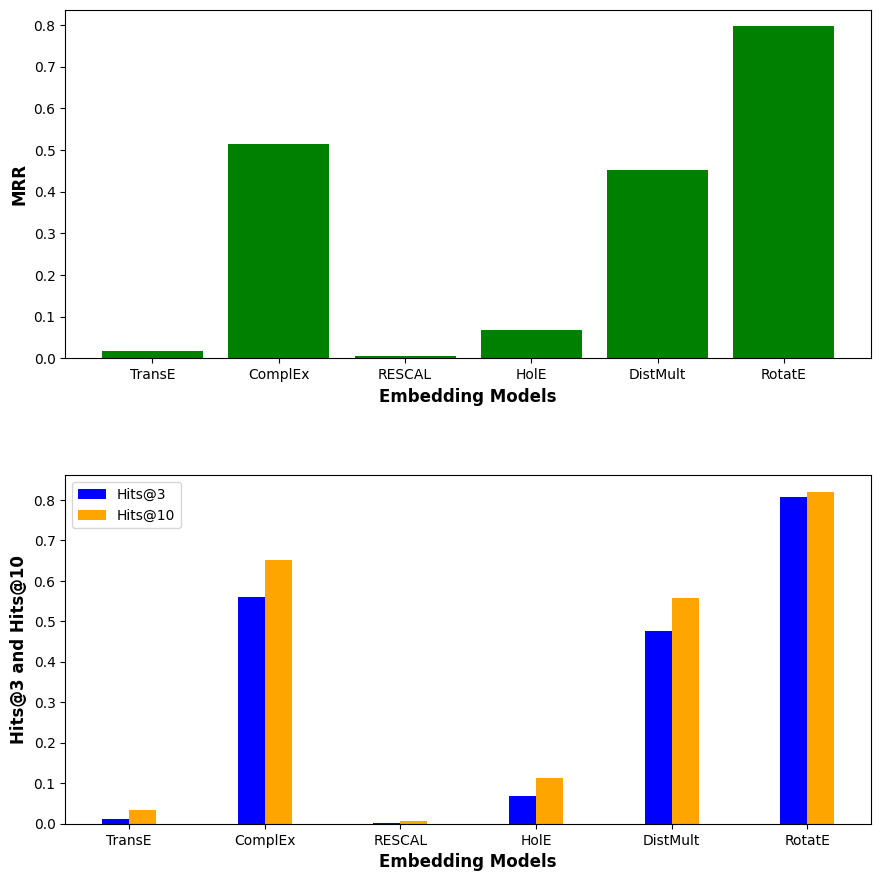

In [12]:
import matplotlib.pyplot as plt

models = ['TransE', 'ComplEx', 'RESCAL', 'HolE', 'DistMult', 'RotatE']

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Mean Reciprocal Rank
ax[0].bar(models, mrr, color='green')
# ax[0].set_title('Mean Reciprocal Rank (MRR)')
ax[0].set_xlabel('Embedding Models', fontsize=12, fontweight='bold')
ax[0].set_ylabel('MRR', fontsize=12, fontweight='bold')

# Hits@3 and Hits@10 - Adjusted for overlapping bars
# Note: Adjusting the position for clear visualization
positions = range(len(models))  # Positions for the models
width = 0.2  # Width of the bars

# Plotting Hits@3 and Hits@10 with adjusted positions for clarity
ax[1].bar([p - width/2 for p in positions], hits_3, width=width, color='blue', label='Hits@3')
ax[1].bar([p + width/2 for p in positions], hits_10, width=width, color='orange', label='Hits@10')

# ax[1].set_title('Hits@3 and Hits@10')
ax[1].set_xlabel('Embedding Models', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Hits@3 and Hits@10', fontsize=12, fontweight='bold')
ax[1].legend()
ax[1].set_xticks(positions)
ax[1].set_xticklabels(models)

plt.tight_layout(pad=5.0)
plt.show()